<a href="https://colab.research.google.com/github/JSheleg/ut_austin_aiml_cert/blob/main/Sheleg_Project2_Personal_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
# mount google colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read in data
loan_modeling = pd.read_csv("/content/drive/MyDrive/UT_Austin_ML/maching_learning/project2_personal_loan/Loan_Modelling.csv")

In [ ]:
# copy of data
data = loan_modeling.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
# First 10 rows
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
# Last 10 rows
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [ ]:
# Shape of Data
data.shape
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns')

There are 5000 rows and 14 columns


In [ ]:
# Info on Columns and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
# check for missing values
data.isnull().sum()
print(data.isnull().sum())
print("======================")
print(f'There are {data.isnull().sum().sum()} missing values')

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64
There are 0 missing values


In [ ]:
# check for duplicates
data.duplicated().sum()
print(f'There are {data.duplicated().sum()} duplicated values')

There are 0 duplicated values


In [ ]:
# check uniqueness of ID Column
data.ID.nunique()

5000

In [ ]:
# All values of column ID are unique. Dropping ID column as it doesn't add value to analysis
data = data.drop(['ID'], axis=1)

In [ ]:
data.describe().T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

In [ ]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns')

There are 5000 rows and 13 columns


* Data consists of 5000 rows and 13 columns.
* Column `ID` contains unique values for all rows. This column was dropped as it would contribute nothing to the analysis.
* There are no missing values or duplicates.
* The average `Age` of a customer is 45 with a minimum age of 23 and maximum age of 67.
* The average `Experience` of the customer is 20. With the minimum being -3 and max being 43. ** This will need to be explored as you can't have negative years of experience
* 75% of customers have a `Family` size of 3 or smaller with the average size being 2
* `CCAvg` is slightly skewed to the right and ranging in values from 0-10. Average of 1.93 but a max of 10 indicating a potential for outliers
* `Mortgage` is heavily skewed to the right ranging in values from 0 - 635. It looks like the majority of customers don't have a mortgage
* All the columns are currently numerical, but `Education`,`Personal_Loan`, `Securities_Account`, `CD_Account`, `Online`, `CreditCard` and `ZipCode` need to be converted to categorical

### Initial Pre Processing

#### Remove negative experiences

In [ ]:
# Looking into experience. Min experience is -3, which isn't possible.
data.Experience.unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
# number of values < 0
data[data['Experience']< 0]['Experience'].value_counts()

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

In [ ]:
# Assuming negatives were a typo, convert Experience negative numbers to positives

# Convert -1 to 1, -2 to 2 and -3 to 3 for experience
data['Experience'] = data['Experience'].replace({-1:1,-2:2, -3:3})

# Verify unique values no longer contain negative numbers
data.Experience.unique()


array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

In [ ]:
#check for values < 0
data[data['Experience']< 0]['Experience'].value_counts()

Series([], Name: count, dtype: int64)

#### Converting Categorical variables

In [ ]:
#converting categorical variables to category type
# Education (1: Undergraduate,2: Graduate,3: Advanced/Professional)
# Personal Loan( 0: No, 1:Yes)
# Securities Account (0:No, 1:Yes)
# CD Account (0: No, 1:Yes)
# Online (0:No, 1:Yes)
# Credit Card (0: No, 1: Yes)
# Zip Code( 467 different Zip Codes)
category_column = ['Education','Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode']

data[category_column] = data[category_column].astype('category')

#### Zip Code Exploration

In [ ]:
# Exploration of zip code
zip_codes = data.ZIPCode.nunique()
print(f"Number of unique ZIP codes: {zip_codes}")

Number of unique ZIP codes: 467


This amount of zip codes is way too many to handle. Explore ways to reduce.

In [ ]:
!pip install pgeocode

##### ZIP Codes to Place Names

In [ ]:
# convert zip codes to cities
import pgeocode

In [ ]:
# viewing all data available to us from pgeocode package
nomi = pgeocode.Nominatim('us')
postal_codes = data['ZIPCode'].values.astype('str').tolist()



In [ ]:
nomi.query_postal_code(postal_codes)

postal_code country_code     place_name  state_name state_code  \
0          91107           US       Pasadena  California         CA   
1          90089           US    Los Angeles  California         CA   
2          94720           US       Berkeley  California         CA   
3          94112           US  San Francisco  California         CA   
4          91330           US     Northridge  California         CA   
...          ...          ...            ...         ...        ...   
4995       92697           US         Irvine  California         CA   
4996       92037           US       La Jolla  California         CA   
4997       93023           US           Ojai  California         CA   
4998       90034           US    Los Angeles  California         CA   
4999       92612           US         Irvine  California         CA   

                           county_name  county_code community_name  \
0                          Los Angeles         37.0            NaN   
1                          Los Angeles         37.0            NaN   
2                              Alameda          1.0            NaN   
3     City and County of San Francisco         75.0            NaN   
4                          Los Angeles         37.0            NaN   
...                                ...          ...            ...   
4995                            Orange         59.0            NaN   
4996                         San Diego         73.0            NaN   
4997                           Ventura        111.0            NaN   
4998                       Los Angeles         37.0            NaN   
4999                            Orange         59.0            NaN   

      community_code  latitude  longitude  accuracy  
0                NaN   34.1510  -118.0889       4.0  
1                NaN   33.7866  -118.2987       4.0  
2                NaN   37.8738  -122.2549       4.0  
3                NaN   37.7195  -122.4411       4.0  
4                NaN   34.2283  -118.5368       4.0  
...              ...       ...        ...       ...  
4995             NaN   33.6485  -117.8387       4.0  
4996             NaN   32.8455  -117.2521       4.0  
4997             NaN   34.4451  -119.2565       4.0  
4998             NaN   34.0290  -118.4005       4.0  
4999             NaN   33.6607  -117.8264       4.0  

[5000 rows x 12 columns]

In [ ]:
# Function to get city from zip code
def get_city_from_zip(zip_code):
  city = nomi.query_postal_code(zip_code).place_name
  return city

In [ ]:
# Append City Column to data
data['City'] = data['ZIPCode'].apply(get_city_from_zip)

In [ ]:
# number of cities in data
data.City.nunique()

244

In [ ]:
# check for nulls?
rows_with_null_city_names = data[data['City'].isna()]
rows_with_null_city_names.ZIPCode.unique()

[92717, 93077, 92634, 96651, 92709]
Categories (467, int64): [90005, 90007, 90009, 90011, ..., 96094, 96145, 96150, 96651]

In [ ]:
# 92717 Irvine CA, Orange County
# 93077 Ventura CA, Ventura County
# 92634 Fullerton CA, Orange County
# 96651 San Francisco Military, San Francisco
# 92709 Irvine CA, Orange County


# map for missing cities to ZIP Codes
zip_to_city_mapping = {
   92717: 'Irvine',
   93077: 'Ventura',
   92634: 'Fullerton',
   96651: 'San Francisco Militar',
   92709: 'Irvine'
}

for zip_code, city_name in zip_to_city_mapping.items():
  data.loc[data['ZIPCode'] == zip_code, 'City'] = city_name

print(data[data['ZIPCode'].isin(zip_to_city_mapping.keys())][['ZIPCode', 'City']])

     ZIPCode                   City
106    92717                 Irvine
172    92717                 Irvine
184    92717                 Irvine
321    92717                 Irvine
366    92717                 Irvine
384    93077                Ventura
468    92634              Fullerton
476    92717                 Irvine
630    96651  San Francisco Militar
672    96651  San Francisco Militar
695    92717                 Irvine
702    92709                 Irvine
721    92717                 Irvine
780    92634              Fullerton
1078   92709                 Irvine
1099   92717                 Irvine
1189   92717                 Irvine
1426   96651  San Francisco Militar
1483   92717                 Irvine
1653   96651  San Francisco Militar
1752   92717                 Irvine
1844   92717                 Irvine
2049   92717                 Irvine
2211   92717                 Irvine
2218   92634              Fullerton
2238   92709                 Irvine
2428   92717                

##### Zip Code to County Names:
* There is still too many cities to group successfully.
* Look into county name to see if zip codes can be further refined

In [ ]:
# Function to find County Names
def get_county_from_zip(zip_code):
  county = nomi.query_postal_code(zip_code).county_name
  return county

In [ ]:
data['County'] = data['ZIPCode'].apply(get_county_from_zip)

In [ ]:
# check for nulls?
rows_with_null_county_names = data[data['County'].isna()]
rows_with_null_county_names.ZIPCode.unique()

[92717, 93077, 92634, 96651, 92709]
Categories (467, int64): [90005, 90007, 90009, 90011, ..., 96094, 96145, 96150, 96651]

In [ ]:
# 92717 Irvine CA, Orange County
# 93077 Ventura CA, Ventura County
# 92634 Fullerton CA, Orange County
# 96651 San Francisco Military, San Francisco
# 92709 Irvine CA, Orange County


# map for missing Counties to ZIP Codes
zip_to_county_mapping = {
   92717: 'Orange',
   93077: 'Ventura',
   92634: 'Orange',
   96651: 'City and County of San Francisco',
   92709: 'Orange'
}

In [ ]:
for zip_code, county_name in zip_to_county_mapping.items():
  data.loc[data['ZIPCode'] == zip_code, 'County'] = county_name

print(data[data['ZIPCode'].isin(zip_to_county_mapping.keys())][['ZIPCode', 'County']])

     ZIPCode                            County
106    92717                            Orange
172    92717                            Orange
184    92717                            Orange
321    92717                            Orange
366    92717                            Orange
384    93077                           Ventura
468    92634                            Orange
476    92717                            Orange
630    96651  City and County of San Francisco
672    96651  City and County of San Francisco
695    92717                            Orange
702    92709                            Orange
721    92717                            Orange
780    92634                            Orange
1078   92709                            Orange
1099   92717                            Orange
1189   92717                            Orange
1426   96651  City and County of San Francisco
1483   92717                            Orange
1653   96651  City and County of San Francisco
1752   92717 

In [ ]:
data.County.nunique()

38

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  City                5000 non-null   object  
 14  County              5000 non-null   object  
dtypes: category(7), float64(1), int64(5), 

##### ZIP Code to Zip Code Groups:
* 38 is still better than 244 but the number of groups is still large.
* Look at how to group the counties together to normalize and reduce the number of groups

In [ ]:
# Count the number of customers in each county
county_counts = data['County'].value_counts().reset_index()
county_counts.columns = ['County', 'CustomerCount']
# total number of customers
total_customers = data.shape[0]

# Calculate the percentage of customers in each county
county_counts['Percentage'] = (county_counts['CustomerCount'] / total_customers) * 100
county_counts

County  CustomerCount  Percentage
0                        Los Angeles           1095       21.90
1                          San Diego            568       11.36
2                        Santa Clara            563       11.26
3                            Alameda            500       10.00
4                             Orange            366        7.32
5   City and County of San Francisco            263        5.26
6                          San Mateo            204        4.08
7                         Sacramento            184        3.68
8                      Santa Barbara            154        3.08
9                               Yolo            130        2.60
10                          Monterey            128        2.56
11                           Ventura            115        2.30
12                    San Bernardino            101        2.02
13                      Contra Costa             85        1.70
14                        Santa Cruz             68        1.36
15                         Riverside             56        1.12
16                             Marin             54        1.08
17                              Kern             54        1.08
18                   San Luis Obispo             33        0.66
19                            Solano             33        0.66
20                          Humboldt             32        0.64
21                            Sonoma             28        0.56
22                            Fresno             26        0.52
23                            Placer             24        0.48
24                             Butte             19        0.38
25                            Shasta             18        0.36
26                         El Dorado             17        0.34
27                        Stanislaus             15        0.30
28                        San Benito             14        0.28
29                       San Joaquin             13        0.26
30                         Mendocino              8        0.16
31                          Siskiyou              7        0.14
32                          Tuolumne              7        0.14
33                            Merced              4        0.08
34                           Trinity              4        0.08
35                              Lake              4        0.08
36                          Imperial              3        0.06
37                              Napa              3        0.06

* About 1/3 of customers live in Los Angeles and San Diego. I decided to split the customers by county into 3 relatively equal groups

In [ ]:
# Identify the top 2 counties (LA and San Diego)
top_2_counties = county_counts[county_counts['County'].isin(['Los Angeles', 'San Diego'])]

# Remaining counties excluding the top 2
remaining_counties = county_counts[~county_counts['County'].isin(['Los Angeles', 'San Diego'])]

# Sort the remaining counties by Customer Count
remaining_counties = remaining_counties.sort_values(by='CustomerCount', ascending=False)

# calc the split point for 33% of data
remaining_customers = remaining_counties['CustomerCount'].sum()
target_group_size = remaining_customers * 0.33



In [ ]:
# Group the remaining counties into 2 groups (Group 2 and Group 3) based on customer count
group_2 = []
group_3 = []
current_group_size = 0
is_group_2 = True  # Start with Group 2

for _, row in remaining_counties.iterrows():
    if is_group_2:
        group_2.append(row)
        current_group_size += row['CustomerCount']
        # Switch to Group 3 once we've passed the 33% threshold
        if current_group_size >= target_group_size:
            is_group_2 = False
    else:
        group_3.append(row)

In [ ]:
# Combine the top 2 counties with the group and create a final DF
top_2_counties['ZIPCode_Group'] = '1'
group_2_df = pd.DataFrame(group_2)
group_2_df['ZIPCode_Group'] = '2'
group_3_df = pd.DataFrame(group_3)
group_3_df['ZIPCode_Group'] = '3'

# Concatenate results
final_grouping = pd.concat([top_2_counties, group_2_df, group_3_df])

# Merge final group back to original data
data_with_groups = data.merge(final_grouping[['County', 'ZIPCode_Group']], on='County', how='left')
print(data_with_groups[['County', 'ZIPCode_Group']].head())

                             County ZIPCode_Group
0                       Los Angeles             1
1                       Los Angeles             1
2                           Alameda             2
3  City and County of San Francisco             3
4                       Los Angeles             1


In [ ]:
# Confirm that the ZipCode Group has 3
data_with_groups.ZIPCode_Group.unique()

array(['1', '2', '3'], dtype=object)

In [ ]:
data_with_groups.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'City', 'County',
       'ZIPCode_Group'],
      dtype='object')

In [ ]:
# Convert ZIP Code Group to a categegory
data_with_groups['ZIPCode_Group'] = data_with_groups['ZIPCode_Group'].astype('category')

In [ ]:
data_with_groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  City                5000 non-null   object  
 14  County              5000 non-null   object  
 15  ZIPCode_Group       5000 non-null   ca

In [ ]:
data_with_groups.head()

Age  Experience  Income ZIPCode  Family  CCAvg Education  Mortgage  \
0   25           1      49   91107       4    1.6         1         0   
1   45          19      34   90089       3    1.5         1         0   
2   39          15      11   94720       1    1.0         1         0   
3   35           9     100   94112       1    2.7         2         0   
4   35           8      45   91330       4    1.0         2         0   

  Personal_Loan Securities_Account CD_Account Online CreditCard  \
0             0                  1          0      0          0   
1             0                  1          0      0          0   
2             0                  0          0      0          0   
3             0                  0          0      0          0   
4             0                  0          0      0          1   

            City                            County ZIPCode_Group  
0       Pasadena                       Los Angeles             1  
1    Los Angeles                       Los Angeles             1  
2       Berkeley                           Alameda             2  
3  San Francisco  City and County of San Francisco             3  
4     Northridge                       Los Angeles             1

* Since ZIPCode was converted over to City and County in hopes of reducing the number of zip codes and then the counties were then grouped based on the number of customers to get 3 equal groups, I am dropping zip code and the City and County as the information is not needed.

In [ ]:
#drop ZIPCode, City and County from df
data_with_groups_dropped = data_with_groups.drop(['ZIPCode', 'City', 'County'], axis = 1)
data_with_groups_dropped.head()

Age  Experience  Income  Family  CCAvg Education  Mortgage Personal_Loan  \
0   25           1      49       4    1.6         1         0             0   
1   45          19      34       3    1.5         1         0             0   
2   39          15      11       1    1.0         1         0             0   
3   35           9     100       1    2.7         2         0             0   
4   35           8      45       4    1.0         2         0             0   

  Securities_Account CD_Account Online CreditCard ZIPCode_Group  
0                  1          0      0          0             1  
1                  1          0      0          0             1  
2                  0          0      0          0             2  
3                  0          0      0          0             3  
4                  0          0      0          1             1

In [ ]:
# Save dataframe as copy
dataframe = data_with_groups_dropped.copy()

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  ZIPCode_Group       5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.5 KB


In [ ]:
# View Columns
cols_list = dataframe.columns.tolist()
cols_list

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal_Loan',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard',
 'ZIPCode_Group']

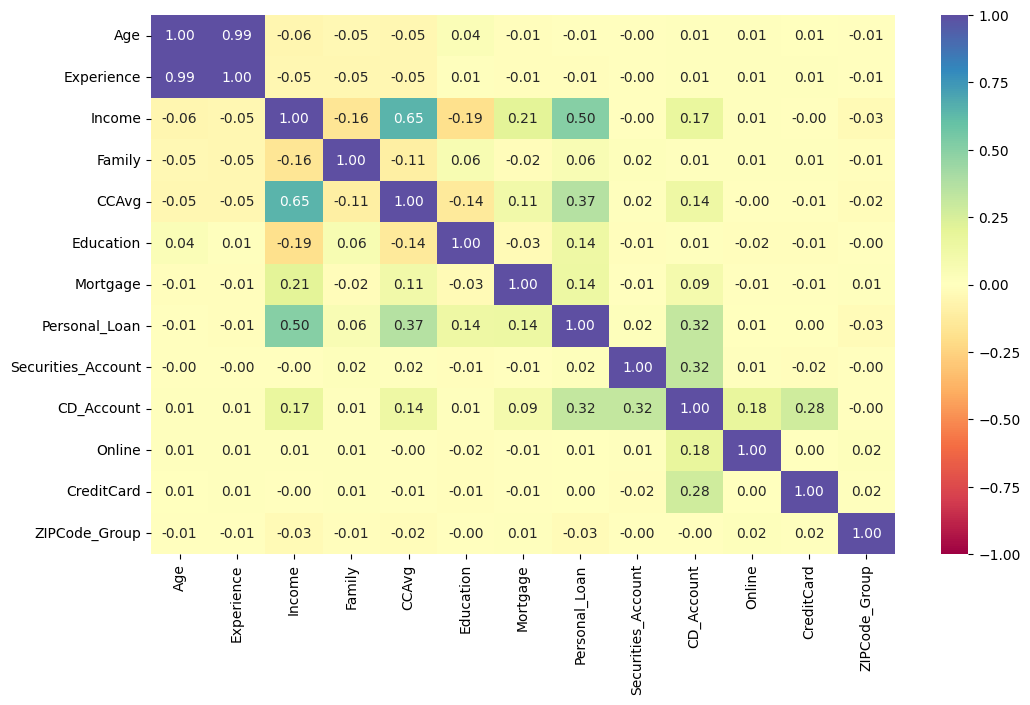

In [ ]:
#correlation across all columns
plt.figure(figsize=(12, 7))
sns.heatmap(
    dataframe[cols_list].corr(numeric_only=False), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Question 3:
What are the attributes that have a strong correlation with the target attribute (personal loan)?
* The three attributes with the strongest correlation with the target attributes:
1. Income (.50)
2. CCAvg (.37)
3. CD_Account (.32)

In [ ]:
dataframe.shape

(5000, 13)

In [ ]:
dataframe.describe().T

count       mean         std   min   25%   50%    75%    max
Age         5000.0  45.338400   11.463166  23.0  35.0  45.0   55.0   67.0
Experience  5000.0  20.134600   11.415189   0.0  10.0  20.0   30.0   43.0
Income      5000.0  73.774200   46.033729   8.0  39.0  64.0   98.0  224.0
Family      5000.0   2.396400    1.147663   1.0   1.0   2.0    3.0    4.0
CCAvg       5000.0   1.937938    1.747659   0.0   0.7   1.5    2.5   10.0
Mortgage    5000.0  56.498800  101.713802   0.0   0.0   0.0  101.0  635.0

* Data consists of 5000 rows and 13 columns as we dropped `ID` and `ZipCode` due to creating a new column `ZipCode Group` that groups the zip codes equally into 3 different groups
* Having converted `Education`,`Personal_Loan`, `Securities_Account`, `CD_Account`, `Online`, `CreditCard` to categorical, the rest of the columns are of type inte64.
* Column `Experience` had a minimum of -3, indicating a mistake in data. There were additional negative number: -1,-2 and -3. Replaced with 1, 2 and 3 respectively.
* The average age of a customer is 45 with a minimum age of 23 and maximum age of 67.
* The average Experience of a customer is 20 years with a minimum of 0 and maximum of 43 years of experience
* Customers spend on credit cards monthly `CCAvg` has an average of 1.93 but a max of 10 indicating a potential for outliers
* `Mortgage` is greatly skewed and it seems majority of the people do not have a mortgage. This needs to be explored further

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

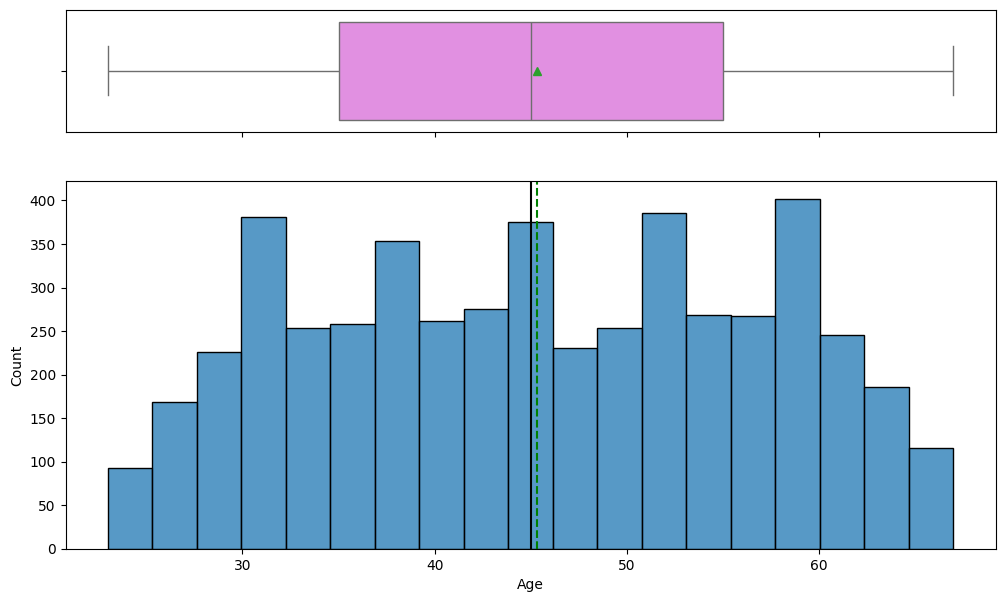

In [ ]:
# Age
histogram_boxplot(dataframe, 'Age')

* The `Age` distribution looks slightly right skewed with a mean Age around 45.
* There are no outliers present

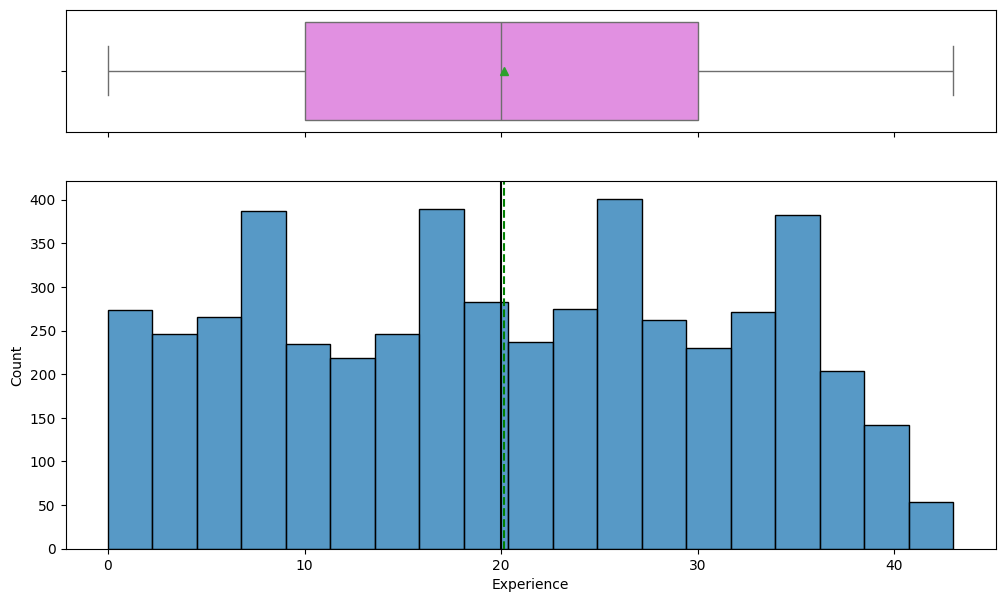

In [ ]:
#Experience
histogram_boxplot(dataframe, 'Experience')

* The Experience distribution looks normal with mean years of experience around 20 years.
* There are no outliers present

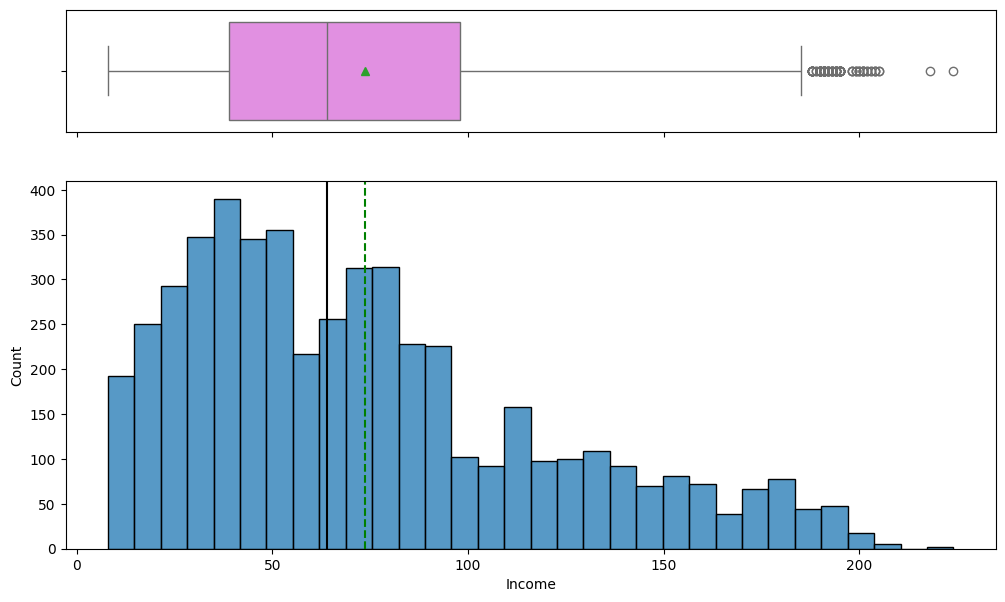

In [ ]:
# Income
histogram_boxplot(dataframe, 'Income')

* `Income` is right skewed with many outliers on the upper quartile
* Mean is around 73,000
* 75% of the customers make 98,000 or less

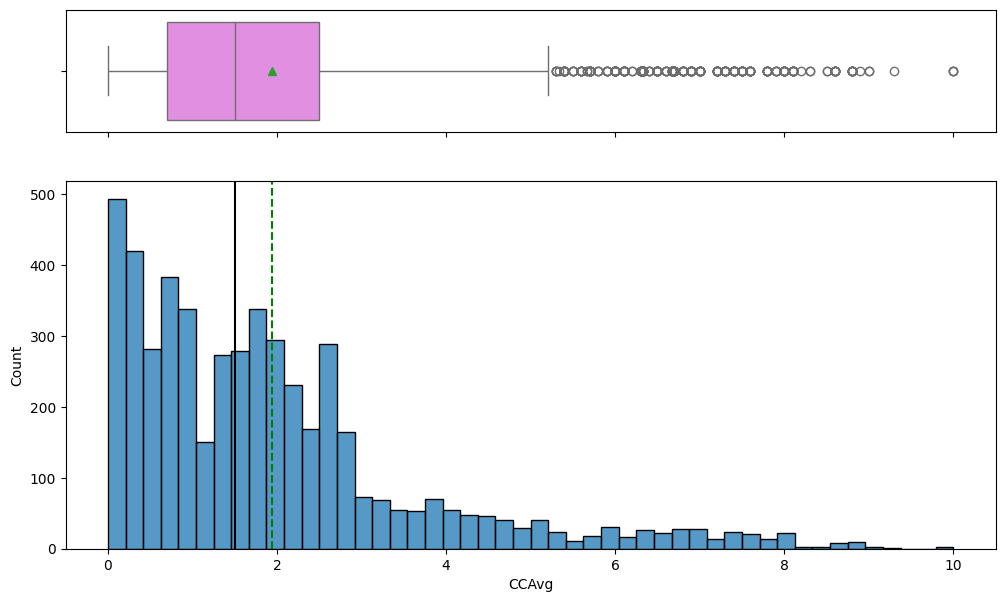

In [ ]:
# CCAvg
histogram_boxplot(dataframe, 'CCAvg')

* `CCAvg` is right skewed with many outliers above 5000
* Average Credit Card spend per month is about 1.9K

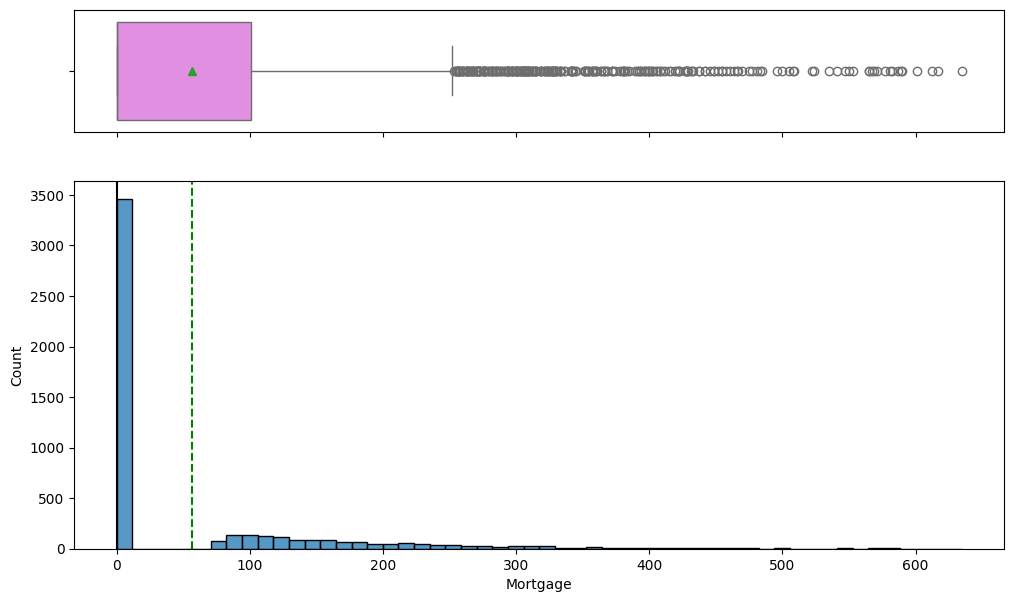

In [ ]:
# Mortgage
histogram_boxplot(dataframe, 'Mortgage')

In [ ]:
# Mortgage is strange with a right skewed tail but really it seems like customers either have a mortgage or they don't. Need to look closer at the mortage
dataframe.Mortgage.describe().T

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

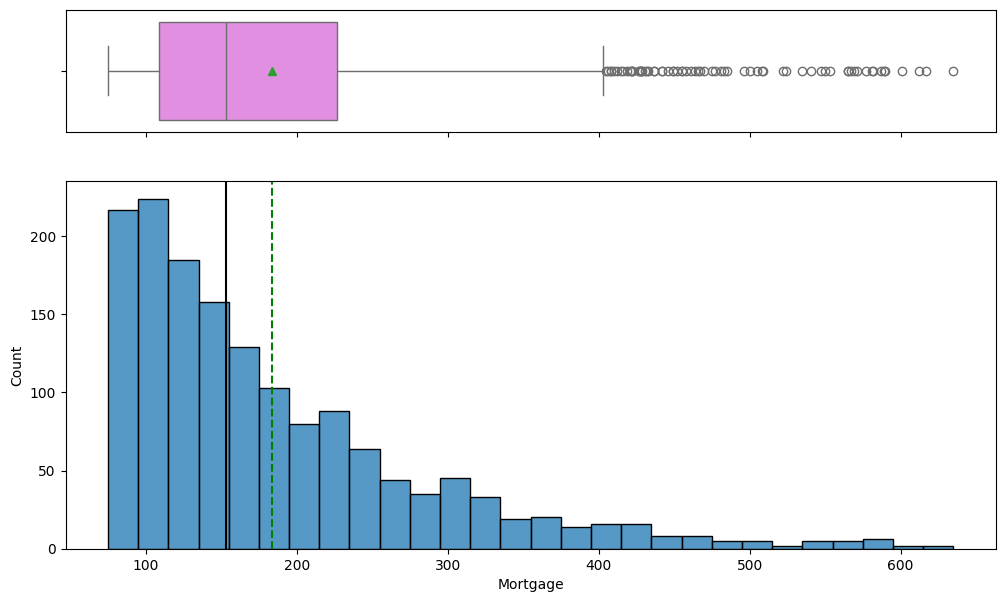

In [ ]:
#plot non-zero mortgage customers
non_zero_mortgage = dataframe[dataframe['Mortgage'] != 0]
histogram_boxplot(non_zero_mortgage, 'Mortgage')

In [ ]:
non_zero_mortgage.Mortgage.describe().T


count    1538.000000
mean      183.676203
std       101.361226
min        75.000000
25%       109.000000
50%       153.000000
75%       227.000000
max       635.000000
Name: Mortgage, dtype: float64

* Histogram still shows Mortgage as skewed to the right, but it is now more readable.
* Of the customers with a mortgage, there are still many outliers above 400,000.
* The average house is about 180,000 with the bulk of the houses costing around the 100,000 mark.
* Of the 5000 customers, only 1538 have a mortgage. This means 69% of customers do not have a mortgage.
* Mean for unaltered mortgage data is 56.49 while mean of mortgage data where non-zero mortgages have been removed is 183.67. This is a big difference. It might be a consideration to handle these values differently.

#### Question 1:
* What is the distribution of mortgage attribute?
  1. The distribution of the Mortgage is Skewed to the right
* Are there any noticeable patterns or outliers in the distribution?
  1. The existance of a mortgage is itself an outlier. Nearly 70% of the customers don't have a mortgage. When looking at the customers that do have a mortgage, majority of the houses average around 180,000

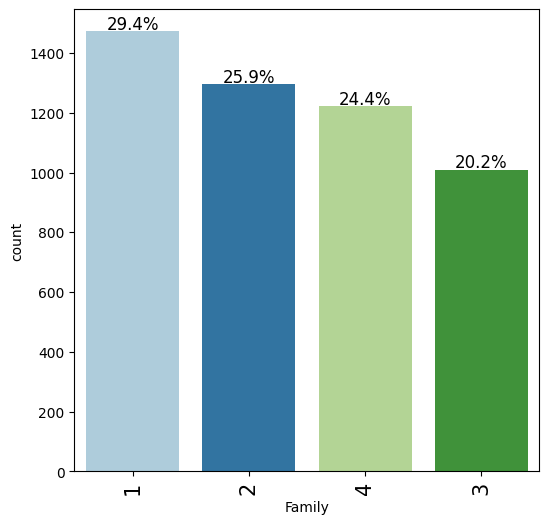

In [ ]:
# Family
labeled_barplot(dataframe, 'Family', perc=True)

* About 30% of families are made up of 1 person. The least common family size is 3 with only 20% of customers having that family size

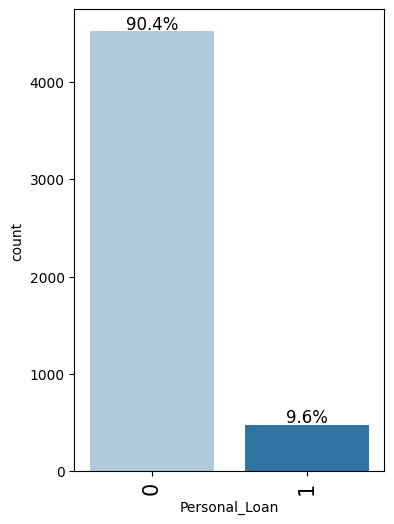

In [ ]:
#Personal Loan
labeled_barplot(dataframe, 'Personal_Loan', perc=True)

* Confirmed that the last campaign did in fact have a conversion rate exceeding 9%

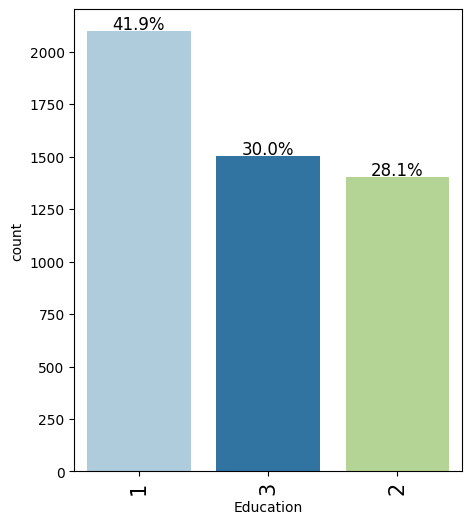

In [ ]:
#Education
labeled_barplot(dataframe, 'Education', perc=True)

* 41.9% of customers have an undergraduate education
* 30% of customers have a advanced/professional education
* 28.1% of customers have an graduate level education

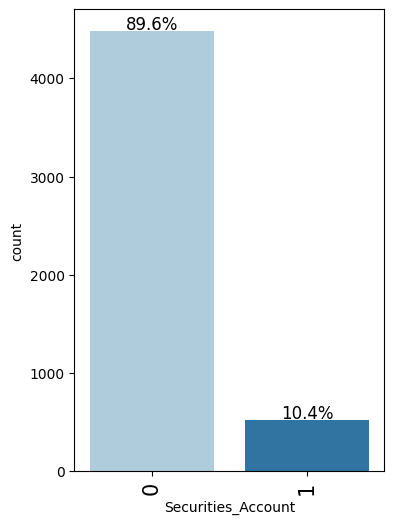

In [ ]:
# Securities Account
labeled_barplot(dataframe, 'Securities_Account', perc=True)

* Nearly 90% of customers do not have a securities account with the bank


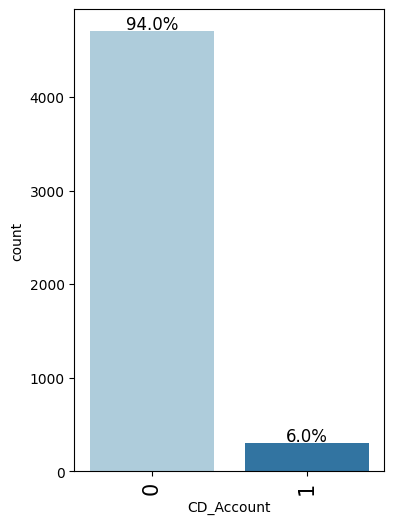

In [ ]:
# CD Account
labeled_barplot(dataframe, 'CD_Account', perc=True)

* 94% of customers do not have CD Accounts with the bank

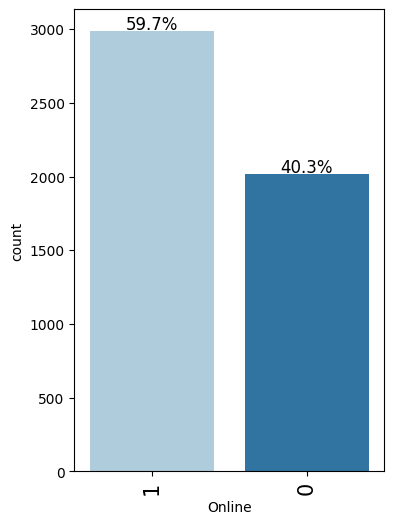

In [ ]:
#Online
labeled_barplot(dataframe, 'Online', perc=True)

* Nearly 60% of customers utilize the online banking services

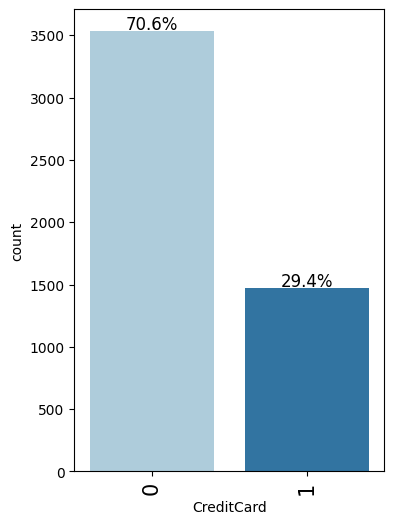

In [ ]:
#Credit Card
labeled_barplot(dataframe, 'CreditCard', perc=True)

* Over 70% of customers dont have credit cards issued by another Bank

In [ ]:
dataframe.CreditCard.value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

In [ ]:
# Find no credit card. Have 0 for CCAvg and have 0 for CreditCard
credit_spend_0 =dataframe[dataframe['CCAvg'] == 0]
credit_spend_0
print(f"Shape of df where users have neither a CCAvg or Credit Card from different bank: {credit_spend_0.shape}")

Shape of df where users have neither a CCAvg or Credit Card from different bank: (106, 13)


#### Question 2:
How many customers have credit cards?
* There are 1470 customers that have credit cards issues by another bank as indicated by the value 1.
* 3530 customers don't have a card issued by another bank, but the data doesn't say whether they have a card issued by AllLife.
* I can find that there are 106 customers that have a CCAvg spend of zero which I conclude to mean they don't have a credit card.
* This means there are 3,424 customers that don't have a card issued by another bank but have CCAvg indicating that they have only a credit card issued by AllLife.

Summary:
* 5000 customers total
* 106 customers without credit card
* 3424 customers with only a AllLife credit card
* 1470 customers with a different brank card **BUT** there is no indications whether they also have an AllLife credit card as well.

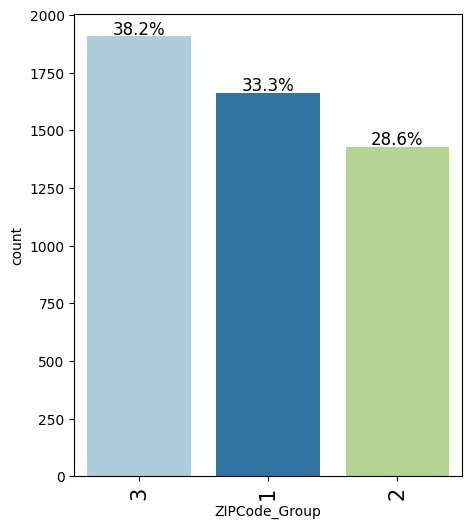

In [ ]:
#ZIP Code Group (grouped via counties)
labeled_barplot(dataframe, 'ZIPCode_Group', perc=True)

In [ ]:
dataframe.ZIPCode_Group.value_counts(dropna=False)

ZIPCode_Group
3    1908
1    1663
2    1429
Name: count, dtype: int64

* Having grouped the counties and distributed roughly evenly into 3 different groups
* Group 1 has the 2 most populous counties in terms of where the customers are from
* Group 2 has the next largest amount
* Group 3 contains all the very small counties that had just a few customers in them.
* I attempted to group without splitting a county between groups which is why they aren't perfectly even.

### Bivariate Analysis

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

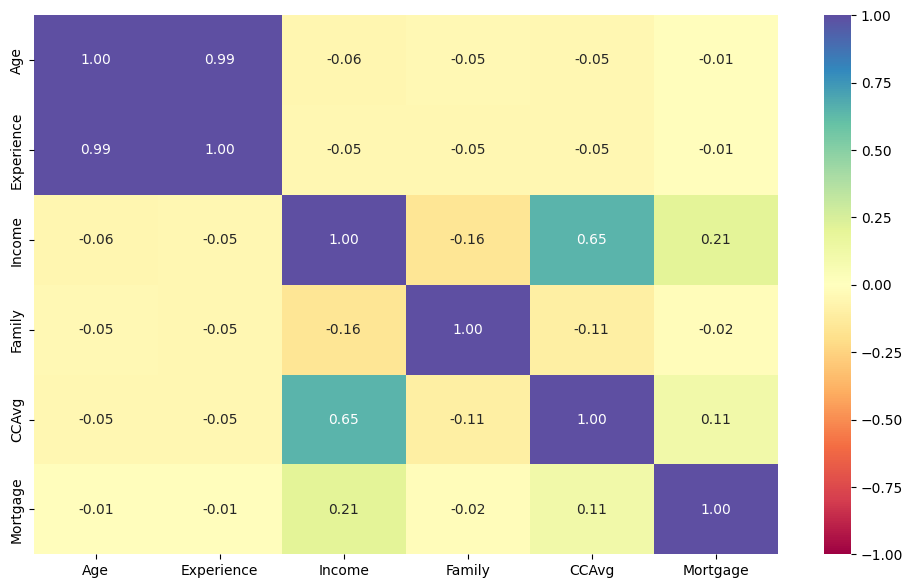

In [ ]:
#correlation
plt.figure(figsize=(12, 7))
sns.heatmap(
    dataframe[cols_list].corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There is a positive correlation between `Income` and `CCAvg` at .65
* There is a positive correlation between `Age` and `Experience` at 0.99
* There is a slight positive correlation between `Income` and `Mortgage` at 0.21


In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


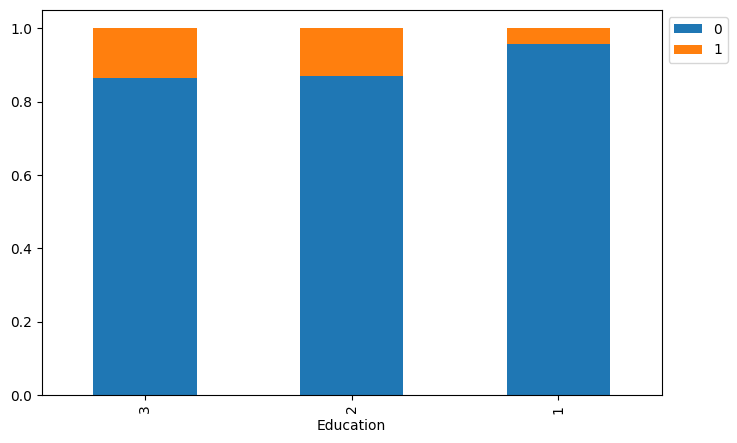

In [ ]:
# Personal Loan vs Education
stacked_barplot(dataframe, 'Education', 'Personal_Loan')

* Majority of the personal loans were taken out by customers who had either a Graduate or Advanced/ Professional Degree.
* 90% of customers do not have a personal loan
* Customers with just an undergraduate degree were the least likely to accept the personal loan offered in the last campaign

* Possible customer is one with higher levels of education

In [ ]:
# Loans accepted by education
loan_accepted = dataframe[data['Personal_Loan'] == 1]
loan_accepted['Education'].value_counts()

Education
3    205
2    182
1     93
Name: count, dtype: int64

In [ ]:
dataframe.Education.value_counts()

Education
1    2096
3    1501
2    1403
Name: count, dtype: int64

#### Question 5:
How does a customer's interest in purchasing a loan vary with their education?
* As the level of education goes up, the more likely that a customer would accept the personal loan.

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


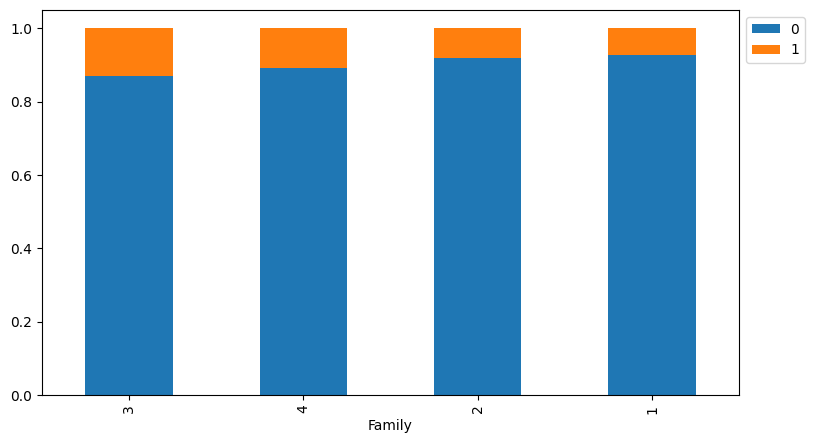

In [ ]:
# Personal Loan vs Family
stacked_barplot(dataframe, 'Family', 'Personal_Loan')

* Customers with larger family sizes were more likely to accept the offer of the personal loan.
* Possible customer is one with a larger family size

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


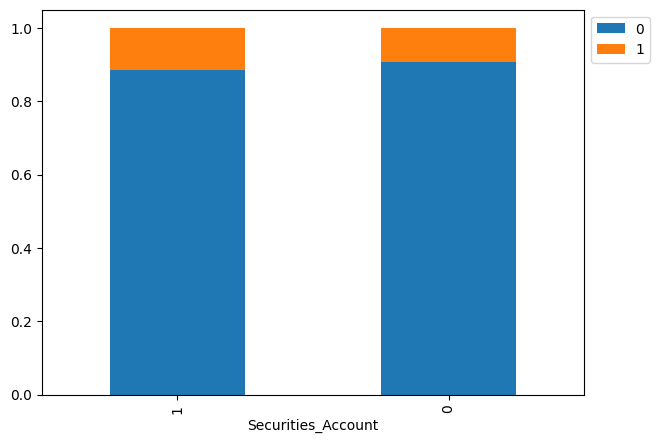

In [ ]:
#Personal Loan vs Securities Accounts
stacked_barplot(dataframe,'Securities_Account','Personal_Loan')

* Of the customers with `Securities Accounts`(522 customers), 60 of the customers also agreed to a personal loan. That is about a 11% conversion
* There were 4478 customers without Securities Accounts, 420 Accepted a personal loan. This is about a 9.4% conversion
* Possible customers are customers with existing Securities accounts

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


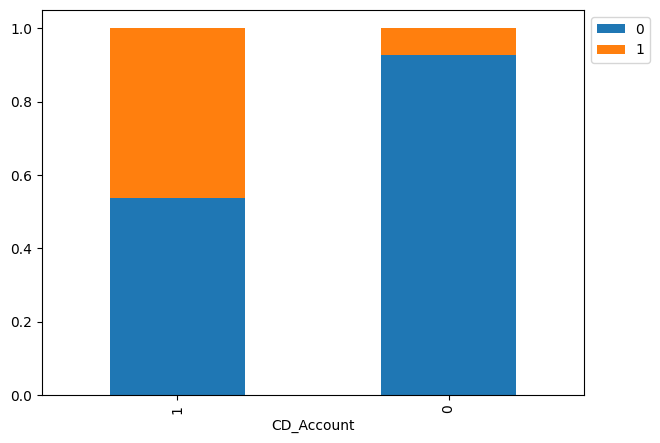

In [ ]:
# Personal Loan vs CD Accounts
stacked_barplot(dataframe, 'CD_Account', 'Personal_Loan')

* Of the Customer with `CD Accounts`, over 46% of them accepted the personal loan offer while only 7% of customers with out `CD Accounts` accepted the personal loan offer.
* Customer is much more likely to accept the Personal Loan offer if they alread have a CD Account

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


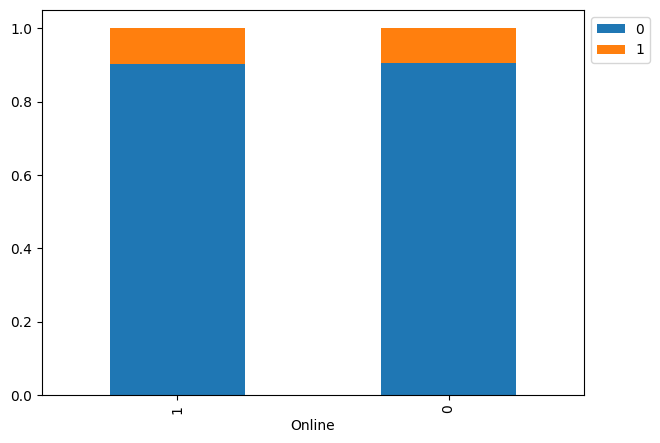

In [ ]:
# Personal Loan vs Online Banking
stacked_barplot(dataframe, 'Online', 'Personal_Loan')

* Of the 2984 customers who are online,9.75% accepted the personal loan
* Of the 2016 customers who aren't using online banking, 9.38% accepted the personal loan.
* The percentage of conversions is super similar, indicating that using the online banking or not has little effect on accepting the personal loan.

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


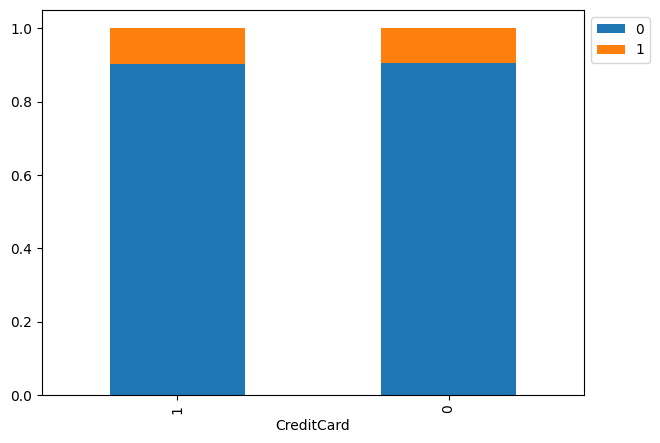

In [ ]:
# Personal Loan vs Credit Card Issue Source
stacked_barplot(dataframe, 'CreditCard', 'Personal_Loan')

* Of the 1470 Customers who have credit cards issues by other banks, 9.7% accepted the personal loan offer
* Of the 3530 Customers who only have ALL LIFE BANK Credit Cards, only 9.5% of customers accepted the personal loan offer.
* This would indicate, that Credit Cards being issue either with ALL LIFE BANK or with a competitor has no effect on the customer accepting a personal loan offer.


Personal_Loan     0    1   All
ZIPCode_Group                 
All            4520  480  5000
1              1493  170  1663
3              1746  162  1908
2              1281  148  1429
------------------------------------------------------------------------------------------------------------------------


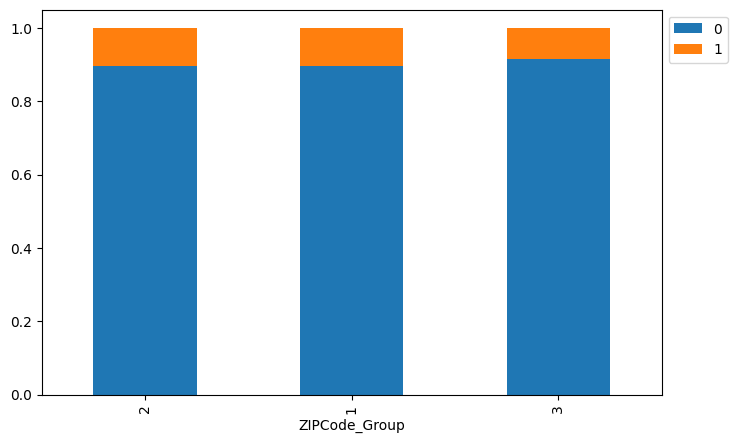

In [ ]:
# Personal Loan vs Zip Code
stacked_barplot(dataframe, 'ZIPCode_Group', 'Personal_Loan')

* Personal loans across the Zip codes seem to be consistant, I don't think this will play a major fact in the decisions

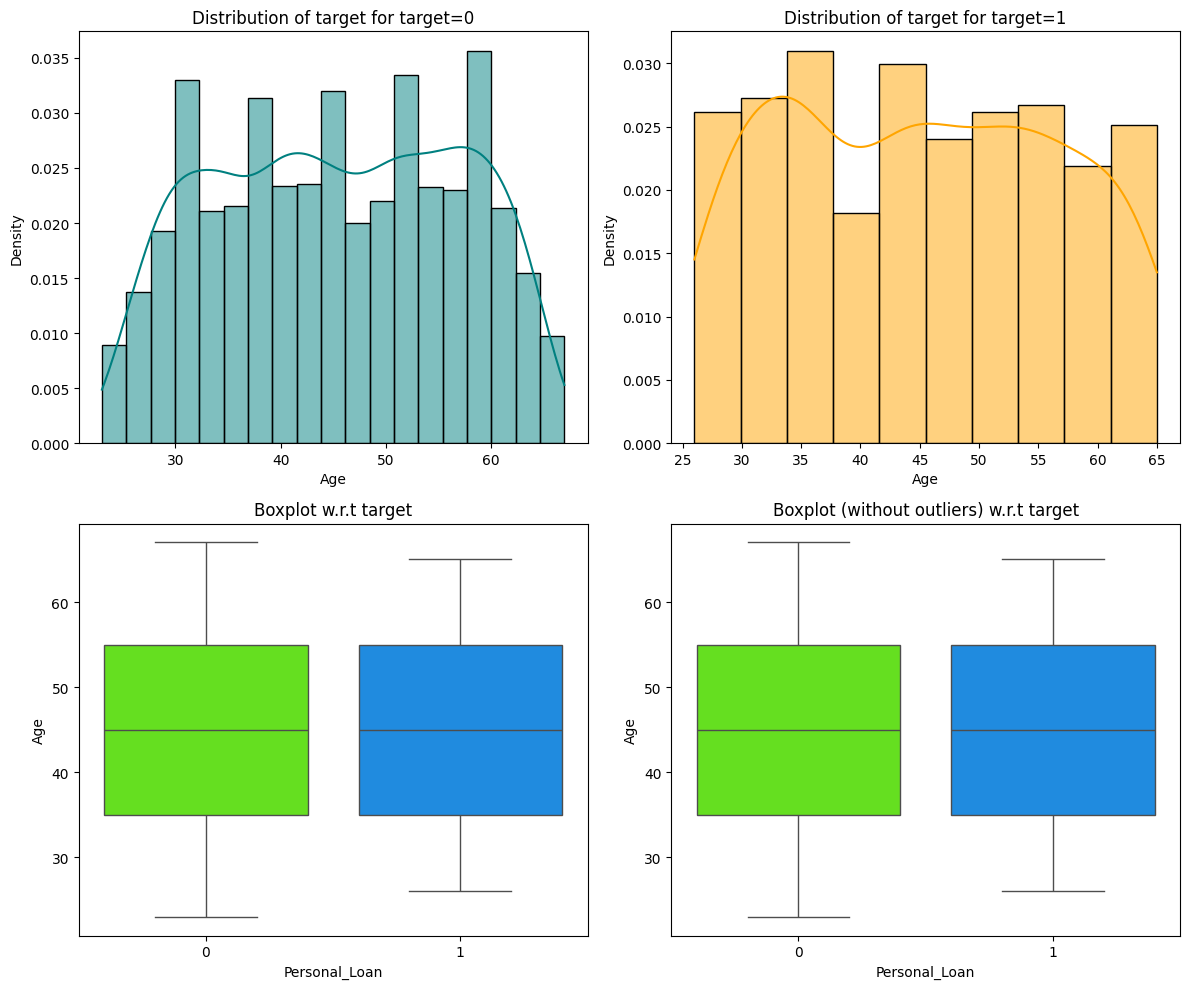

In [ ]:
# Personal Loan vs Age
distribution_plot_wrt_target(dataframe, 'Age', 'Personal_Loan')

* The distributions between age and acceptance of personal loan seems to be normally distributed. Customers of all ages have accepted or denied the personal loans. There are no major outliers and the data looks to be evenly distributed.

#### Question 4:
How does a customer's interest in purchasing a loan vary with their age?
* Customers who have taken the bulk of the personal loans have been in their late 30s
* Customers interested in personal loans also seem to be condensed closer in age then customers who turned them down as indicated by their smaller whiskers on the box plot.
* This could be because of the assumed risk of loans or the lack of need for loans.

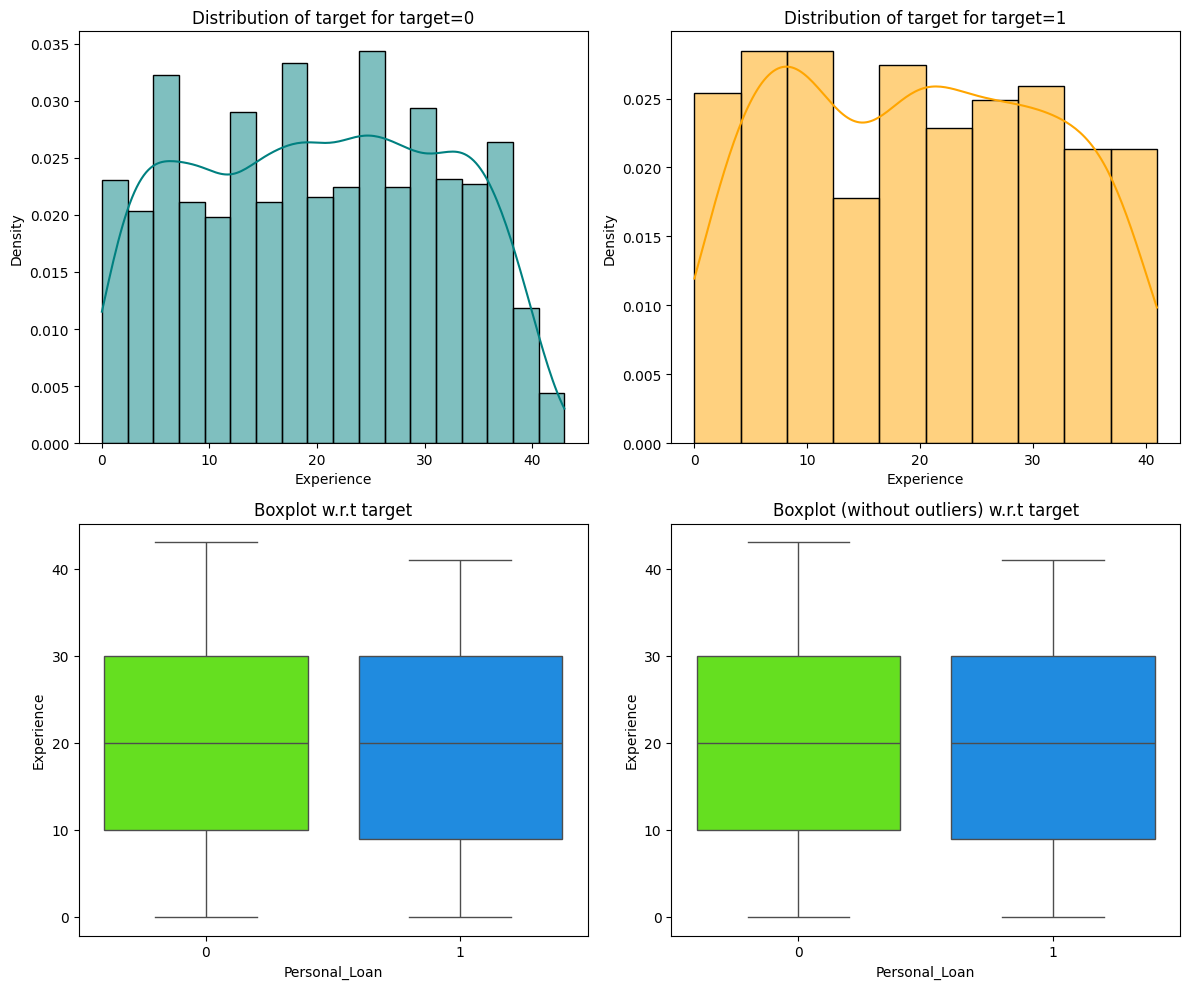

In [ ]:
# Personal Loan vs Experience
distribution_plot_wrt_target(dataframe, 'Experience', 'Personal_Loan')

* Roughly normal in shape
* It looks like as experience increases, there is a drop in personal loans with the peak being around 10 years.

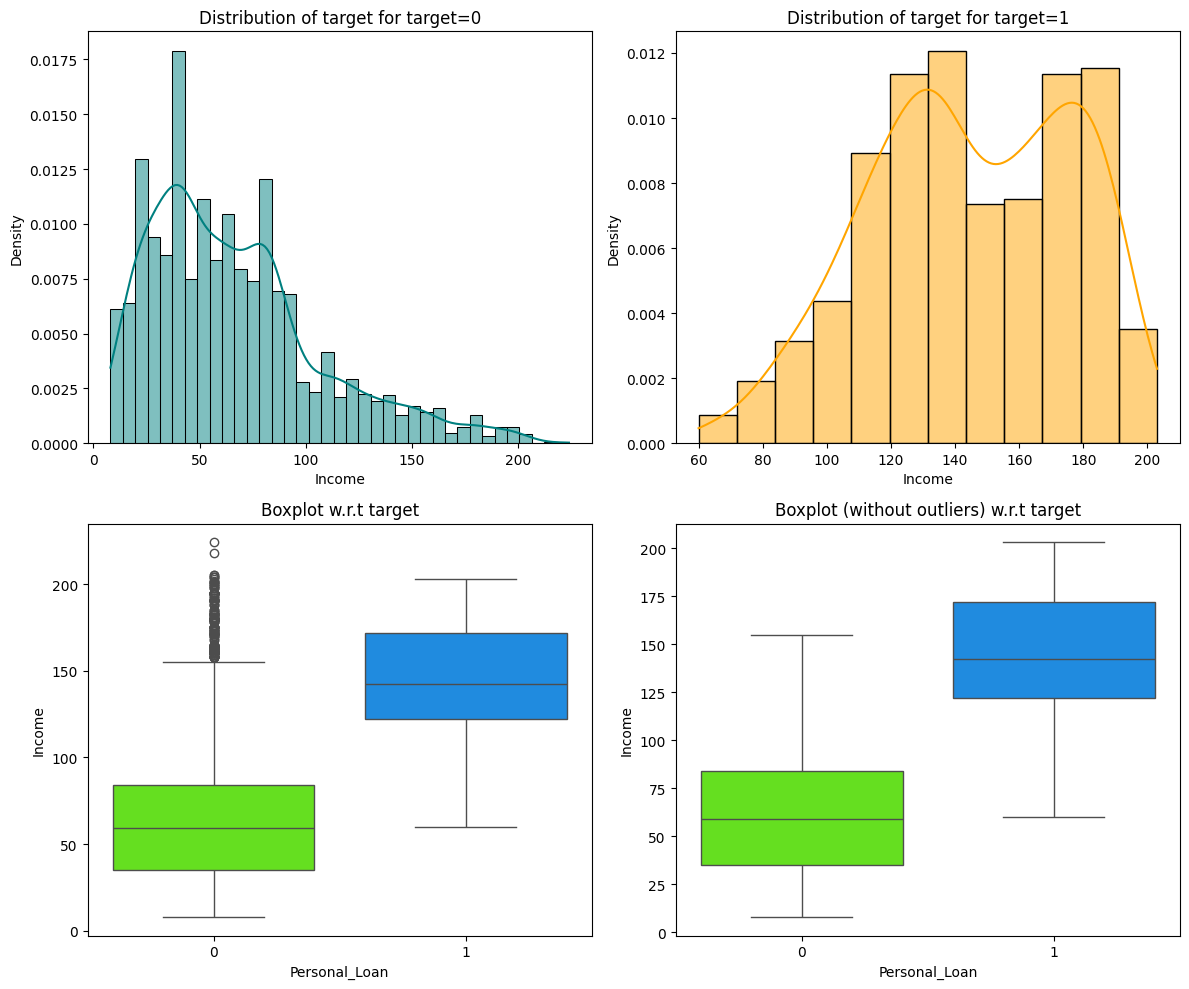

In [ ]:
# Personal Loan vs Income
distribution_plot_wrt_target(dataframe, 'Income', 'Personal_Loan')

* For those who didn't take out the loan, the data is skewed right
* For those who took out the loan, the data is skewed left
* On average the median income for customers who did take out the personal loan is about 130,000, while the median for those who didn't take out the personal loan was about 60,000. This would indicate that higher earners were more likely to take on the risk of the personal loan.

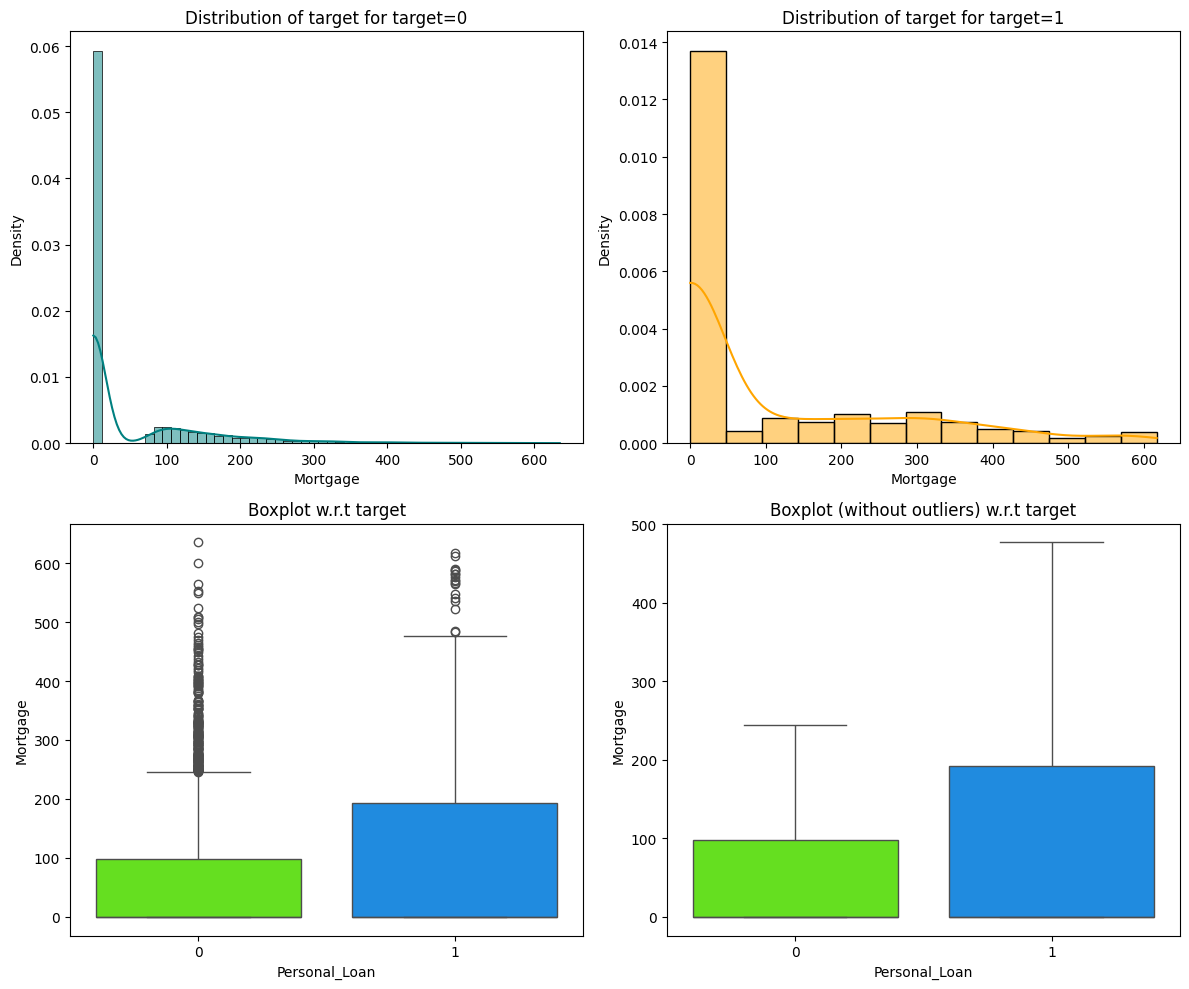

In [ ]:
# Personal Loan vs Mortgage
distribution_plot_wrt_target(dataframe, 'Mortgage', 'Personal_Loan')

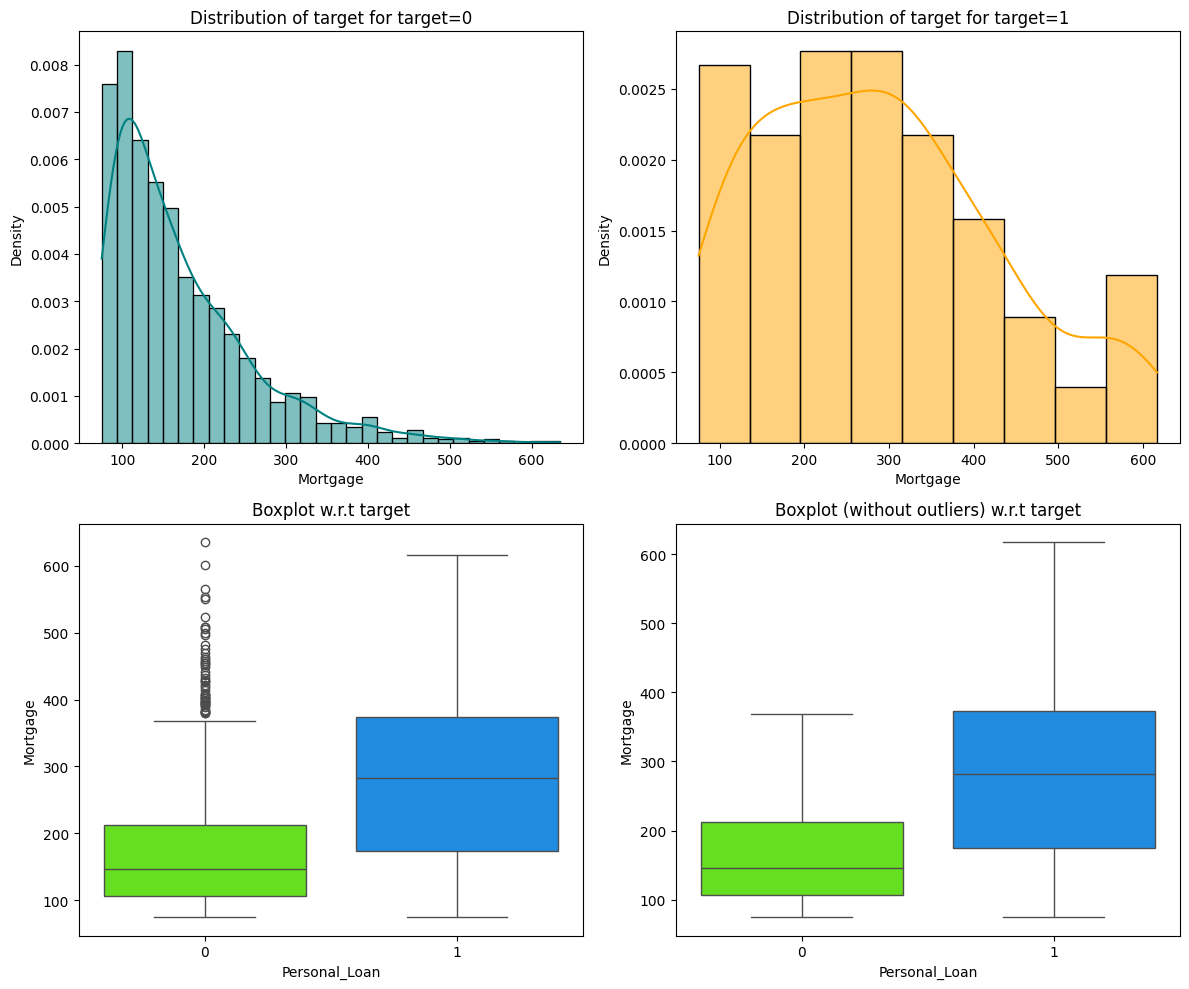

In [ ]:
# Personal Loan vs Mortgages (Non-zero)
distribution_plot_wrt_target(non_zero_mortgage, 'Mortgage', 'Personal_Loan')

* Data is skewed to the right with it being more distinct for customers who didn't get a personal loan.
* Customers who didn't get a personal loan also have alot of outliers
* For customers who got a personal loan and had a mortgage, the average mortgage was around 250000.
* I believe that there is something here for mortgages

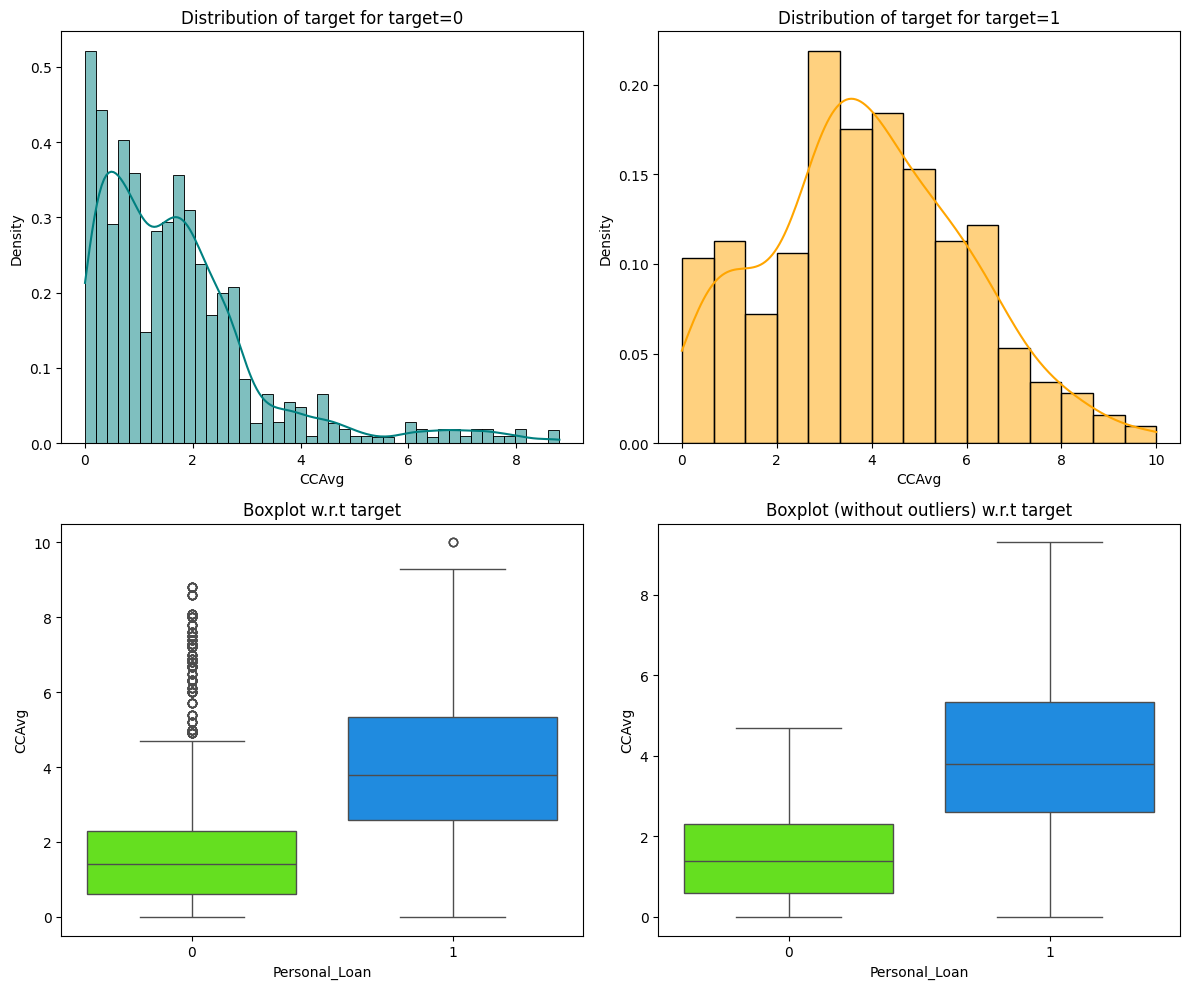

In [ ]:
# Personal Loan vs CCAvg
distribution_plot_wrt_target(dataframe, 'CCAvg', 'Personal_Loan')

* Most customers who took the personal loan spend about 3700 month on credit cards compared to 1900 spent by customers who didn't take out the personal loan.
* CCAvg for customers who didn't the personal loan is skewed right with multiple high spend outliers.

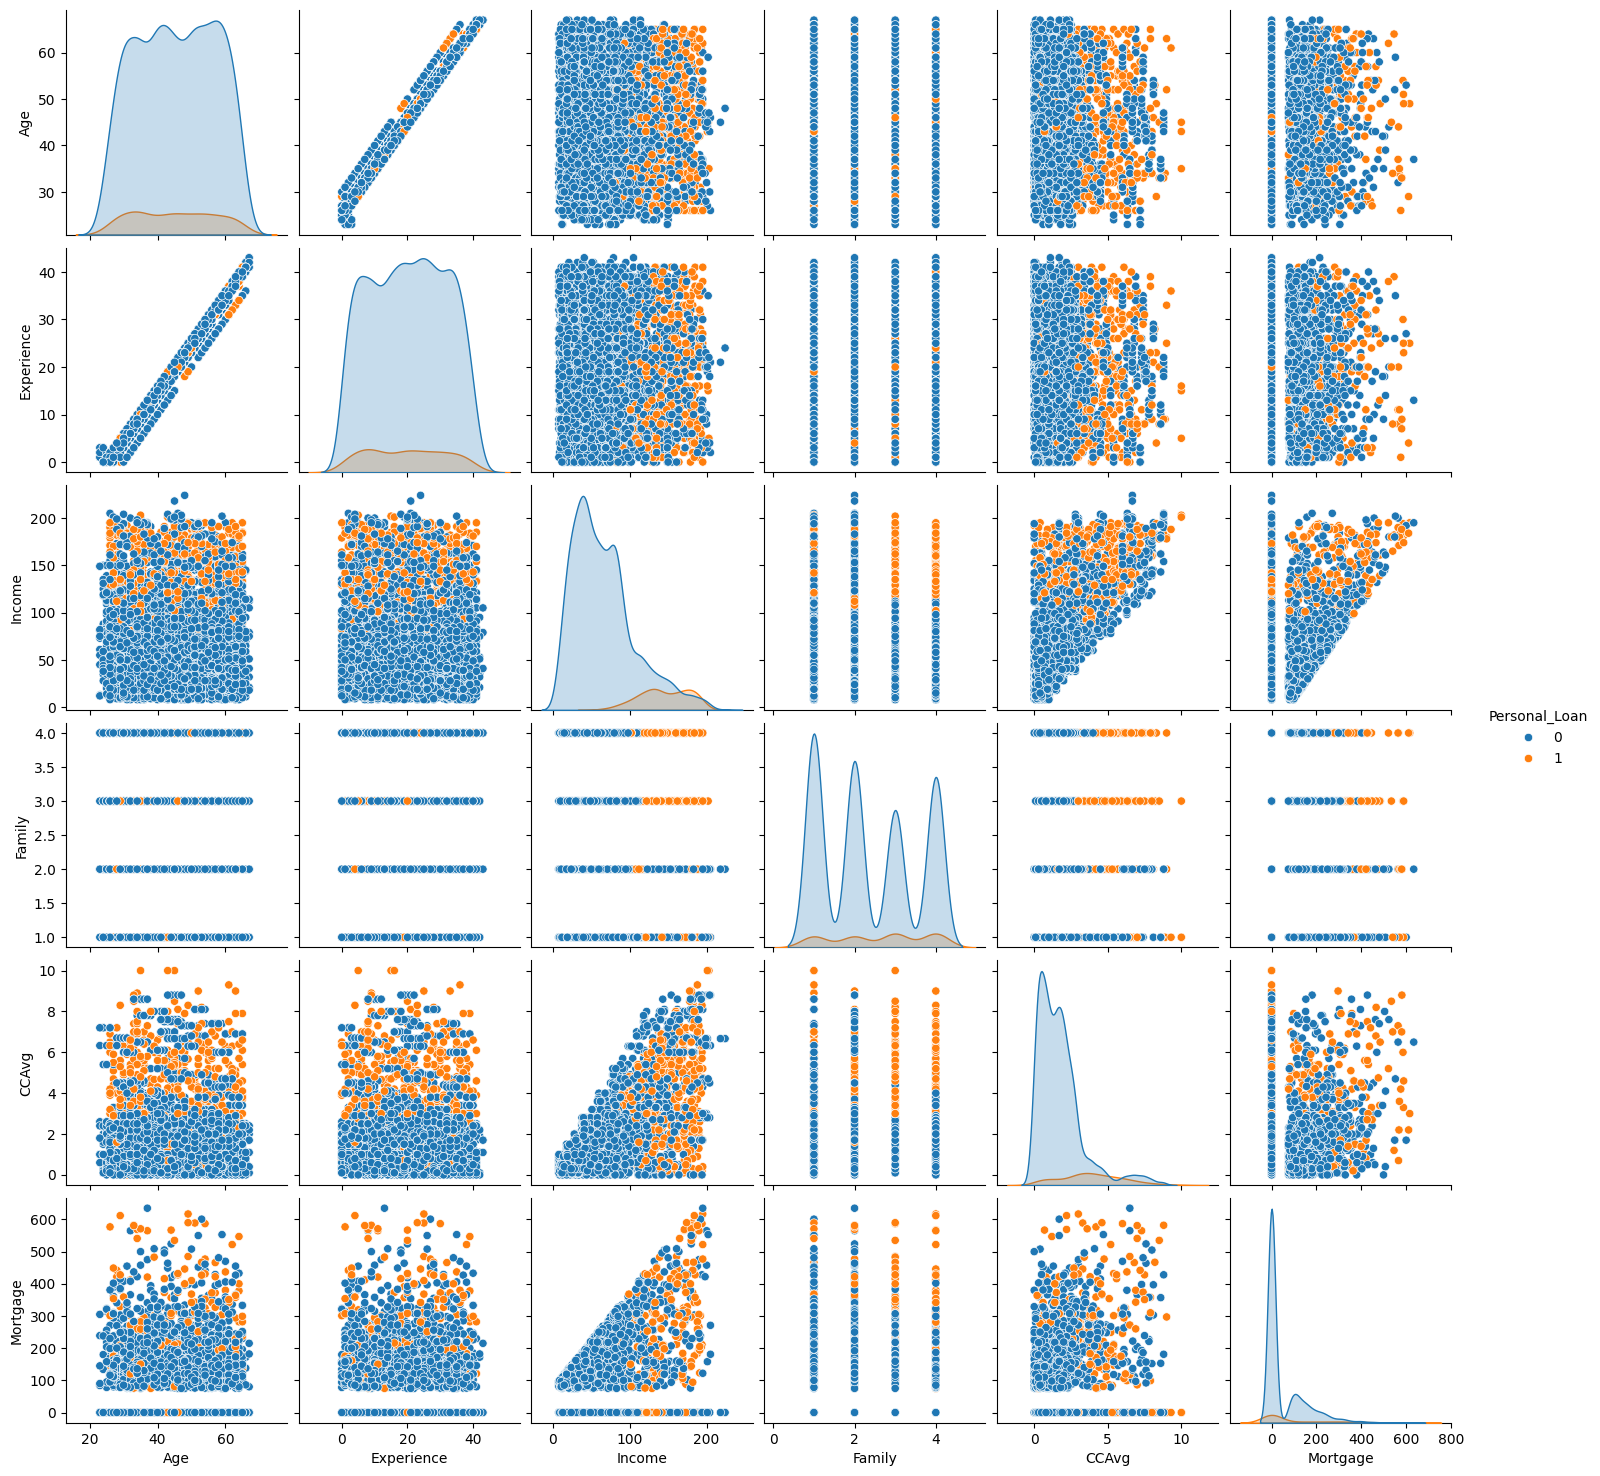

In [ ]:
sns.pairplot(data, hue='Personal_Loan')

* Correlation between Age and Experience, Income and Mortgage, Income and CCAvg

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
 12  ZIPCode_Group       5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.5 KB


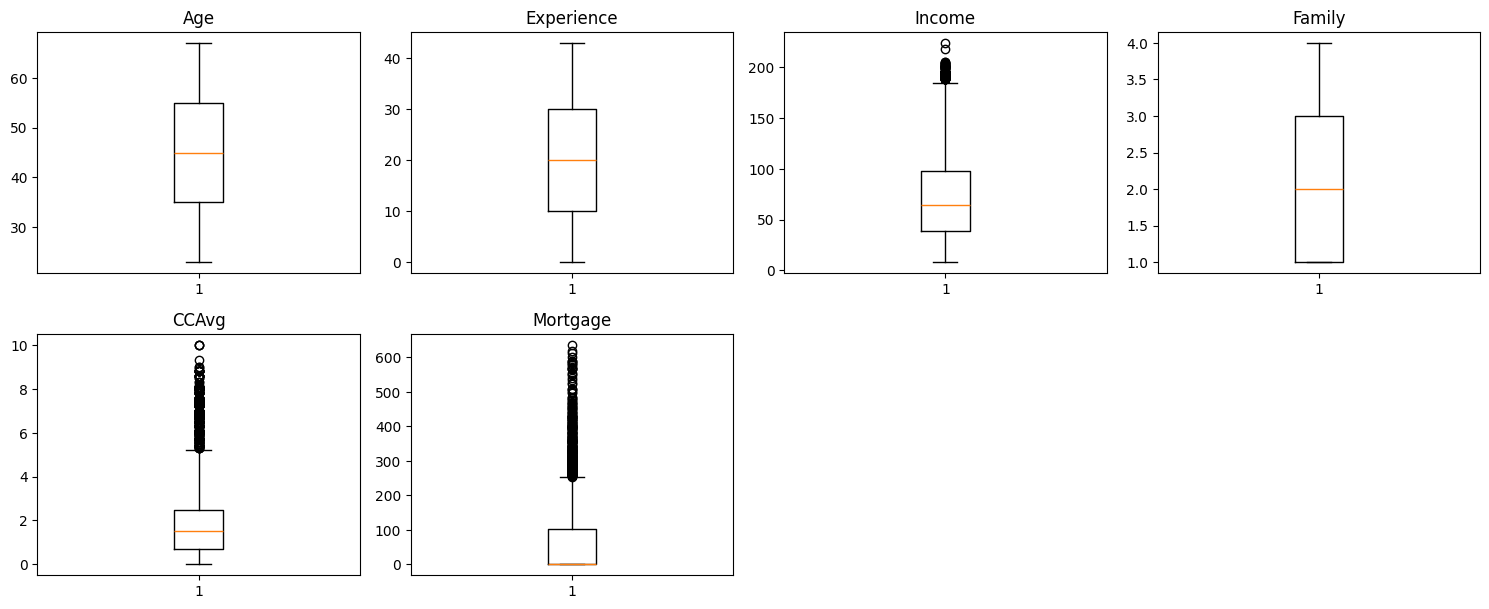

In [ ]:
# Visualize outlier detection
numeric_columns = dataframe.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,12))
for i, variable in enumerate(numeric_columns):
  plt.subplot(4, 4, i + 1)
  plt.boxplot(dataframe[variable], whis=1.5)
  plt.tight_layout()
  plt.title(variable)

plt.show()

* There are quite a few outliers in the data, but I believe they are correct. I will leave them as they are proper values.

In [ ]:
# Mortgage has either a zero or a large value.
# By creating a new column 'Has Mortgage' and keeping the 'Mortgage' column and just turning the zeros into null.
# I hope to further define the data into Mortage and no mortgage.
dataframe_mortgage = dataframe.copy()
dataframe_mortgage['has_mortgage'] = np.where(dataframe_mortgage['Mortgage']> 0, 1,0)
dataframe_mortgage['Mortgage'].replace(0, np.nan)
dataframe_mortgage



Age  Experience  Income  Family  CCAvg Education  Mortgage  \
0      25           1      49       4    1.6         1         0   
1      45          19      34       3    1.5         1         0   
2      39          15      11       1    1.0         1         0   
3      35           9     100       1    2.7         2         0   
4      35           8      45       4    1.0         2         0   
...   ...         ...     ...     ...    ...       ...       ...   
4995   29           3      40       1    1.9         3         0   
4996   30           4      15       4    0.4         1        85   
4997   63          39      24       2    0.3         3         0   
4998   65          40      49       3    0.5         2         0   
4999   28           4      83       3    0.8         1         0   

     Personal_Loan Securities_Account CD_Account Online CreditCard  \
0                0                  1          0      0          0   
1                0                  1          0      0          0   
2                0                  0          0      0          0   
3                0                  0          0      0          0   
4                0                  0          0      0          1   
...            ...                ...        ...    ...        ...   
4995             0                  0          0      1          0   
4996             0                  0          0      1          0   
4997             0                  0          0      0          0   
4998             0                  0          0      1          0   
4999             0                  0          0      1          1   

     ZIPCode_Group  has_mortgage  
0                1             0  
1                1             0  
2                2             0  
3                3             0  
4                1             0  
...            ...           ...  
4995             2             0  
4996             1             1  
4997             3             0  
4998             1             0  
4999             2             0  

[5000 rows x 14 columns]

In [ ]:
# Outlier Detection

Q1 = dataframe.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = dataframe.select_dtypes(include=[np.number]).quantile(0.75)

# Find the Interquartile Range of the data.
IQR = Q3 - Q1

# Find the upper and lower bounds of the data, outside of which are outliers.
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [ ]:
# Number of Outliers
((dataframe.select_dtypes(include=["float64", "int64"]) < lower_bound) | (data.select_dtypes(include=["float64", "int64"]) > upper_bound)
).sum()

Age             0
Experience      0
Income         96
Family          0
CCAvg         324
Mortgage      291
dtype: int64

In [ ]:
dataframe.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard', 'ZIPCode_Group'],
      dtype='object')

In [ ]:
dataframe_mortgage.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard', 'ZIPCode_Group', 'has_mortgage'],
      dtype='object')

* There are many outliers in the Mortgage, Income and CCAvg columns, but this can likely be explained by customers with no mortgages and no credit card spending.
* Heatmap shows a close relationship between `Age` and `Experience` (0.99). Will drop `Experience` due to high correlation.

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
- Predicting a customer will not get a loan, but in reality, the customer gets loan (FN) - Loss of Opportunity
- Predicting a customer will get a loan, but in reality, the customer doesn't get the loan (FP) - Loss of Resources

**Which case is more important?**

- If we predict that a customer will not get a loan, but actually does, then the bank potentially misses out on a customer
- If we predict that customer will get the loan, but actually does not get the loan, then the bank loses the money on marketing.
- Bringing in more customers has more value than the potential loss of marketing


**How to reduce the losses?**

Given the goal is to expand the customer base for loans, I believe that increasing the True Positives (TP) and Reducing the False Negatives(FN) by maximizing **RECALL** is the best approach.



### Model Building

In [ ]:
# Drop Experience as it is closely correlated with Age
# Splitting off Target Variable - Personal loan (y) from rest of the data (X)
X = dataframe.drop(['Personal_Loan', 'Experience'], axis=1)
y = dataframe['Personal_Loan']

# dummy variables
X = pd.get_dummies(X, columns=['Education', 'ZIPCode_Group'], drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 13)
Shape of test set :  (1500, 13)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


* 90.5% of observations belong to class 0 - NO LOAN
* 9.5% of observations belong to class 1 - PERSONAL LOAN
* This is preserved in the train and test sets
* The dataset is considered imbalanced which could affect the performance of the decision tree

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree (sklearn default)

In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Model Performance on Training Data

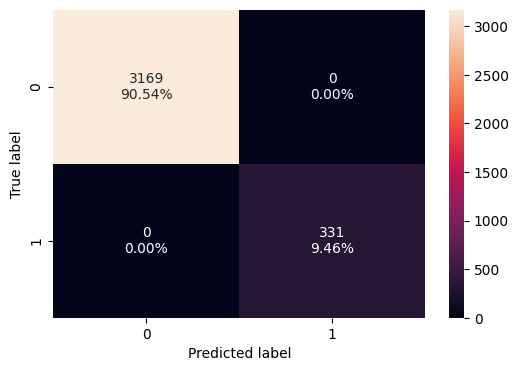

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

* Perfect metrics on training set indicates model is overfitting

####Visualize Decision Tree

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_2', 'Education_3', 'ZIPCode_Group_2', 'ZIPCode_Group_3']


##### Image Tree

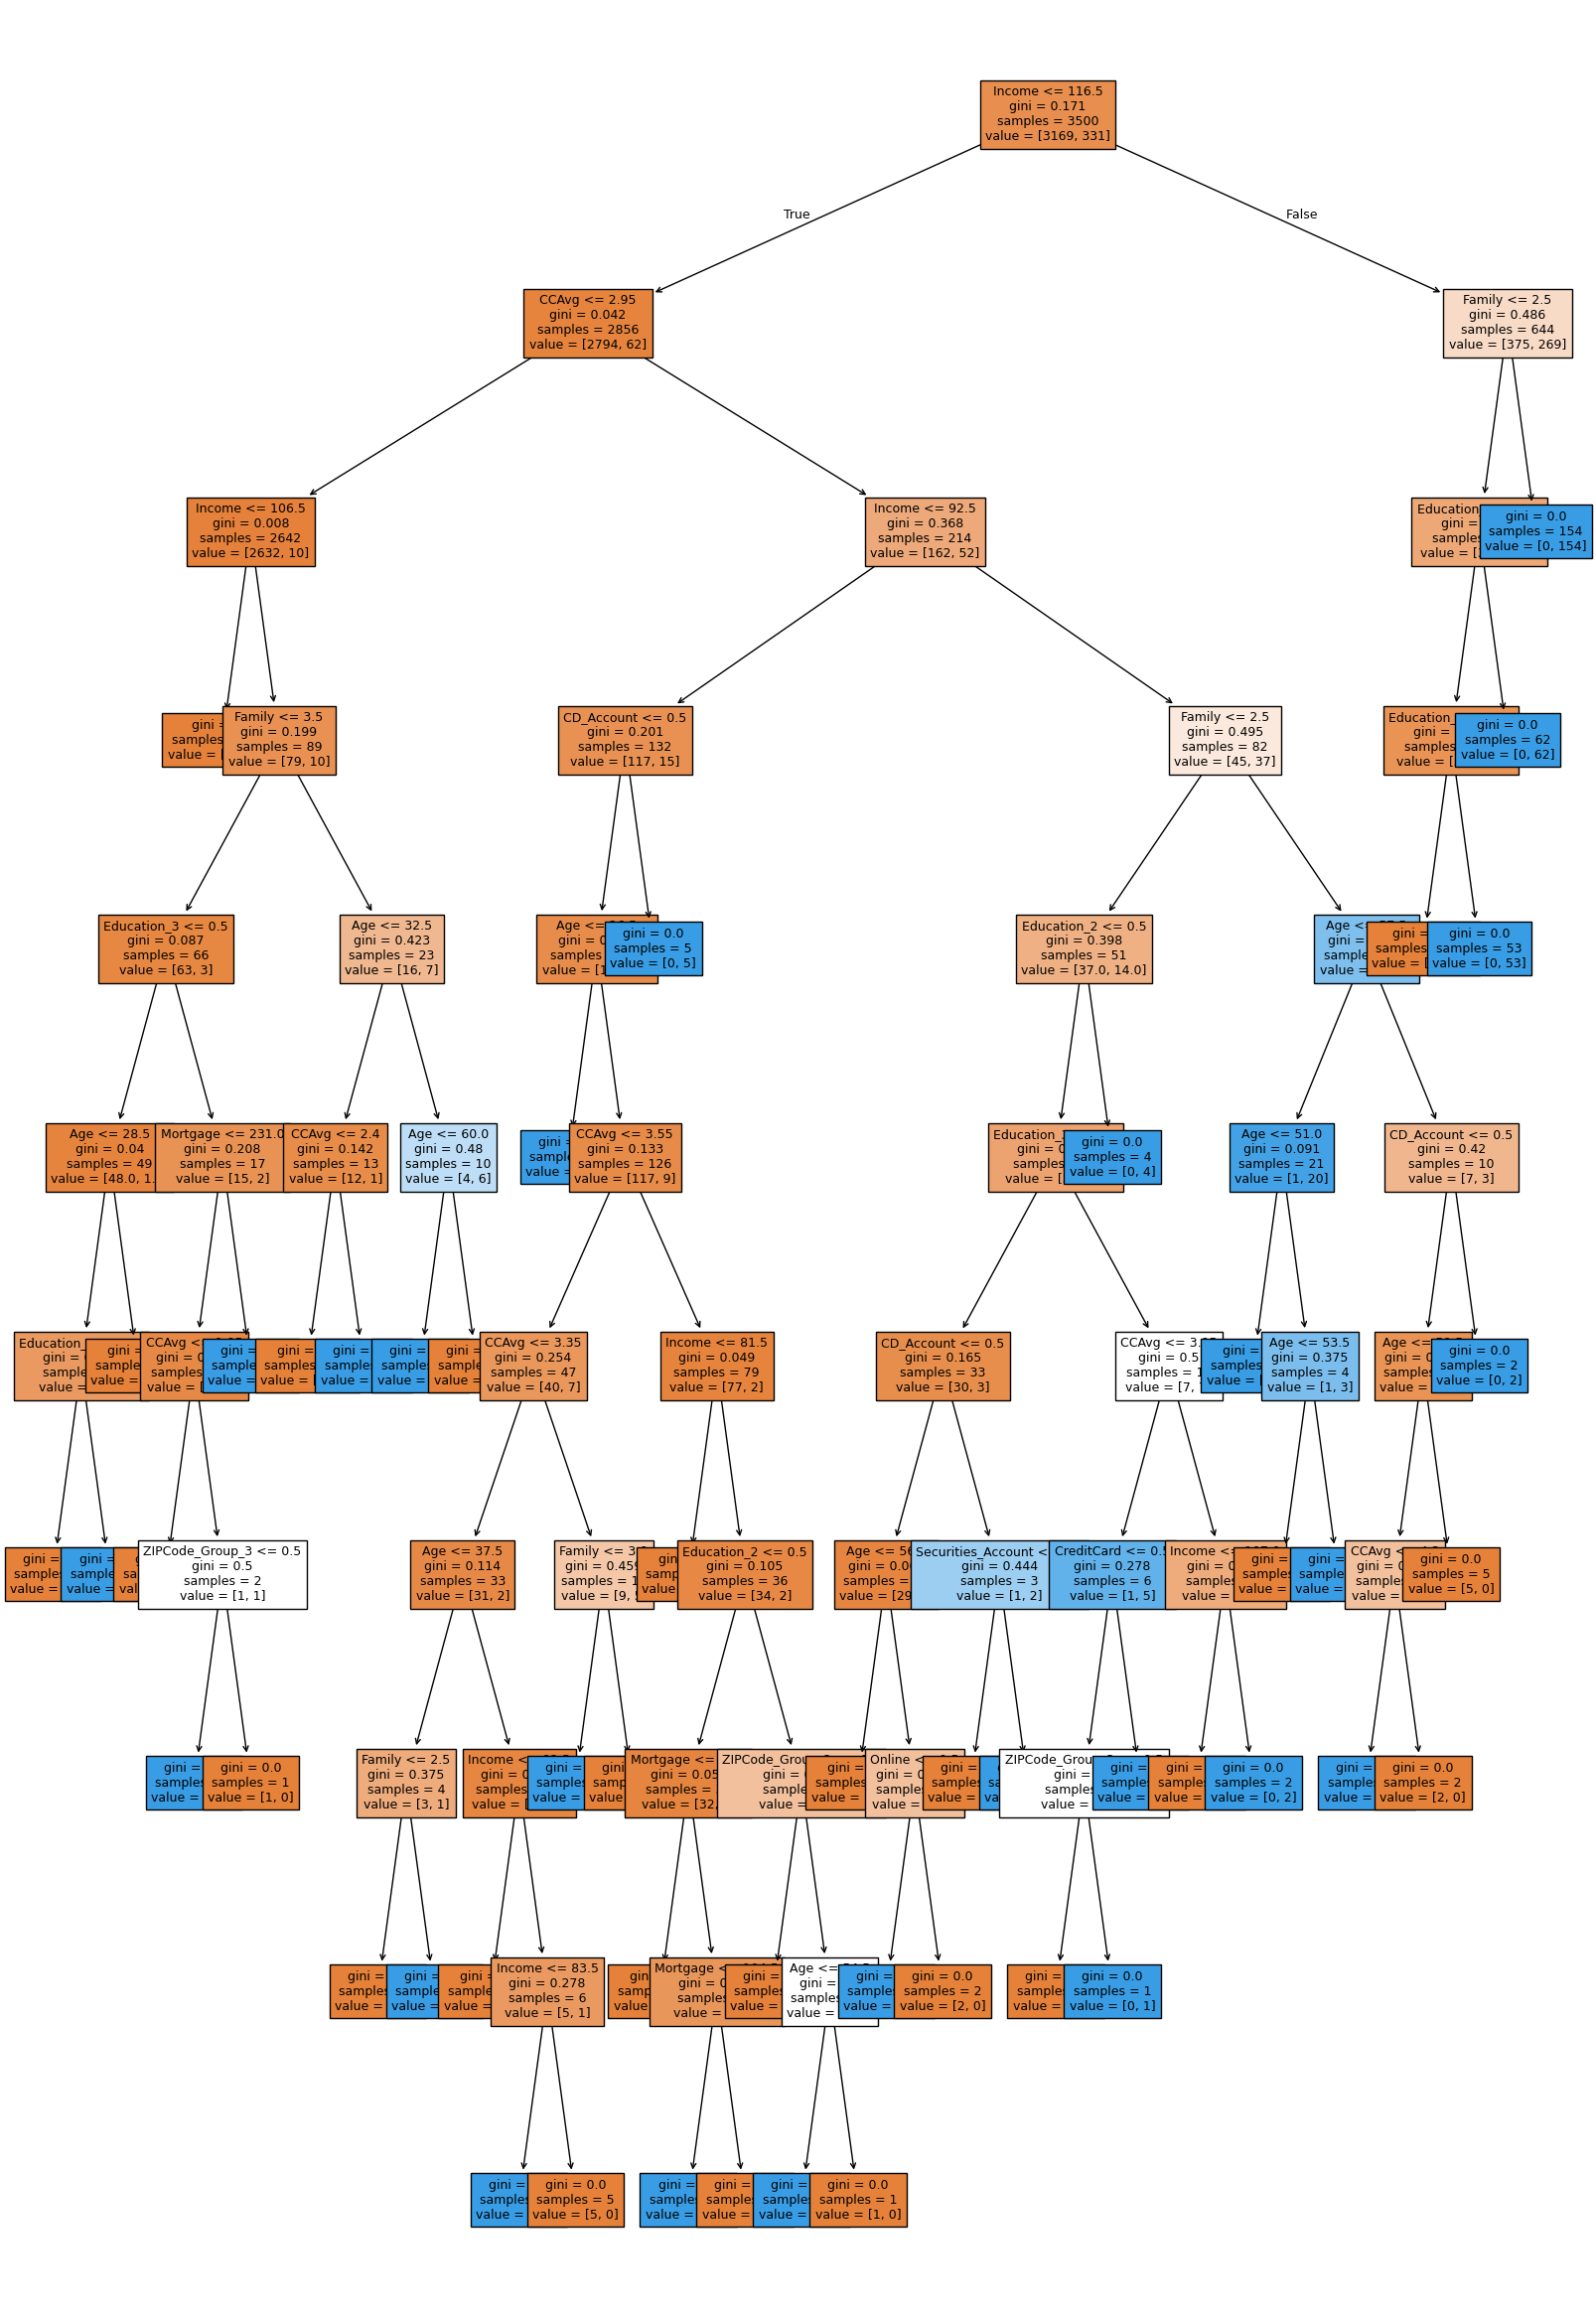

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

##### Text Tree

In [ ]:
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- weights: [43.00, 0.00] class: 0
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- Mortgage <= 231.00
|   |   |   |   |   |   |--- CCAvg <= 1.95
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  1.95
|   |   |   |   |   |   |   |--- ZIPCode_Group_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- ZIPCode_Group_

##### Feature Importance

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.306244
Family              0.260090
Education_2         0.166192
Education_3         0.144605
CCAvg               0.052840
Age                 0.033218
CD_Account          0.021361
Mortgage            0.005996
Securities_Account  0.002224
Online              0.002224
ZIPCode_Group_2     0.002224
ZIPCode_Group_3     0.001668
CreditCard          0.001112


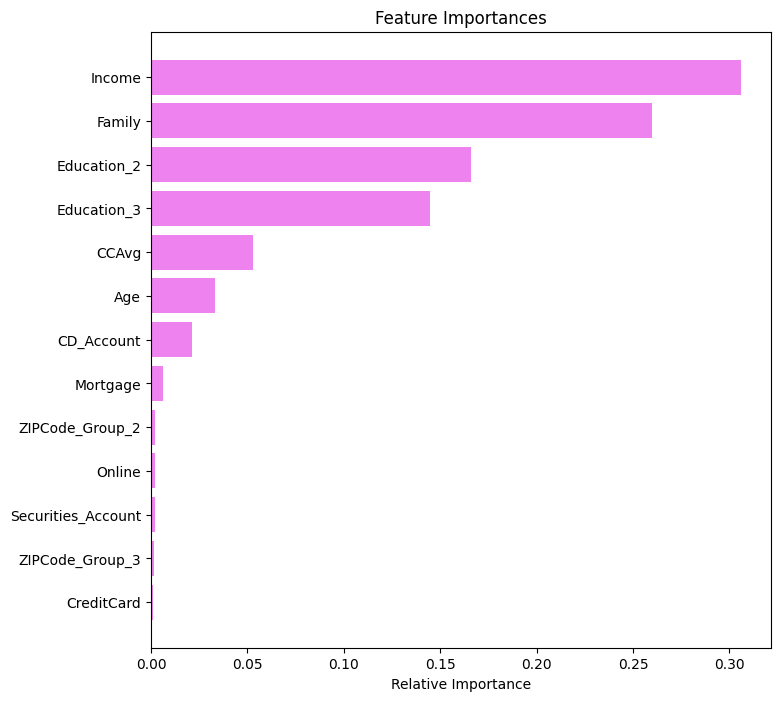

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* For the inital decision tree being allowed to grow without restraint, the most important features are:
  * Income
  * Family
  * Education 2 - Higher/ Master Education
  * Education 3 - Advanced Degree/ Professional
  * CCAvg
  * Age
  * CD Account
  * Mortgage

#### Checking Model performance on test data

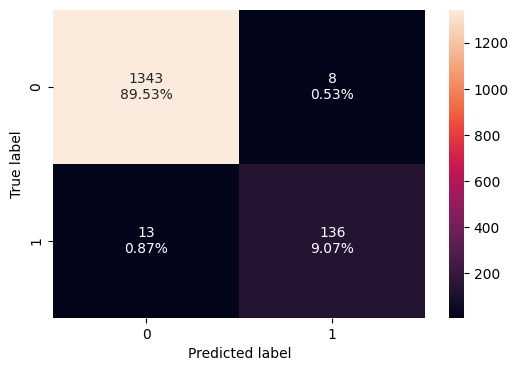

In [ ]:
# Checking 'model' performance on Test Data
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
# Compute confusion matrix for Test Data
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_default_perf_test

Accuracy    Recall  Precision        F1
0     0.986  0.912752   0.944444  0.928328

* Training data had perfect scores while the test data while good is lower indicating overfitting of training data.

## Model Performance Improvement

#### Pre-pruning

In [ ]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(3, 10, 1)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=1
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 4
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 0.959731543624161


In [ ]:
# Fit the best algorithm to the data.
estimator = best_estimator
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

### Model Performance on Training Data

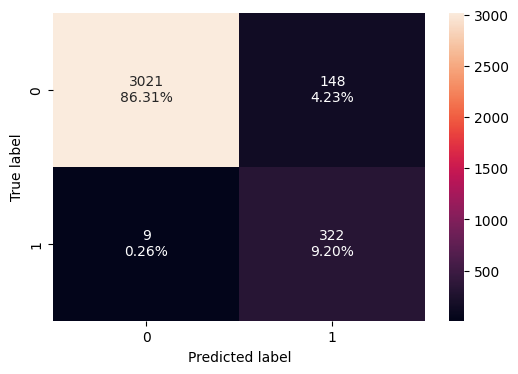

In [ ]:
# Checking performance on training data <Pre-Pruned>
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
# Evaluate the performance of the tuned decsion tree on the training data
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

Accuracy   Recall  Precision        F1
0  0.955143  0.97281   0.685106  0.803995

### Visualize Decision Tree

#### Image Tree

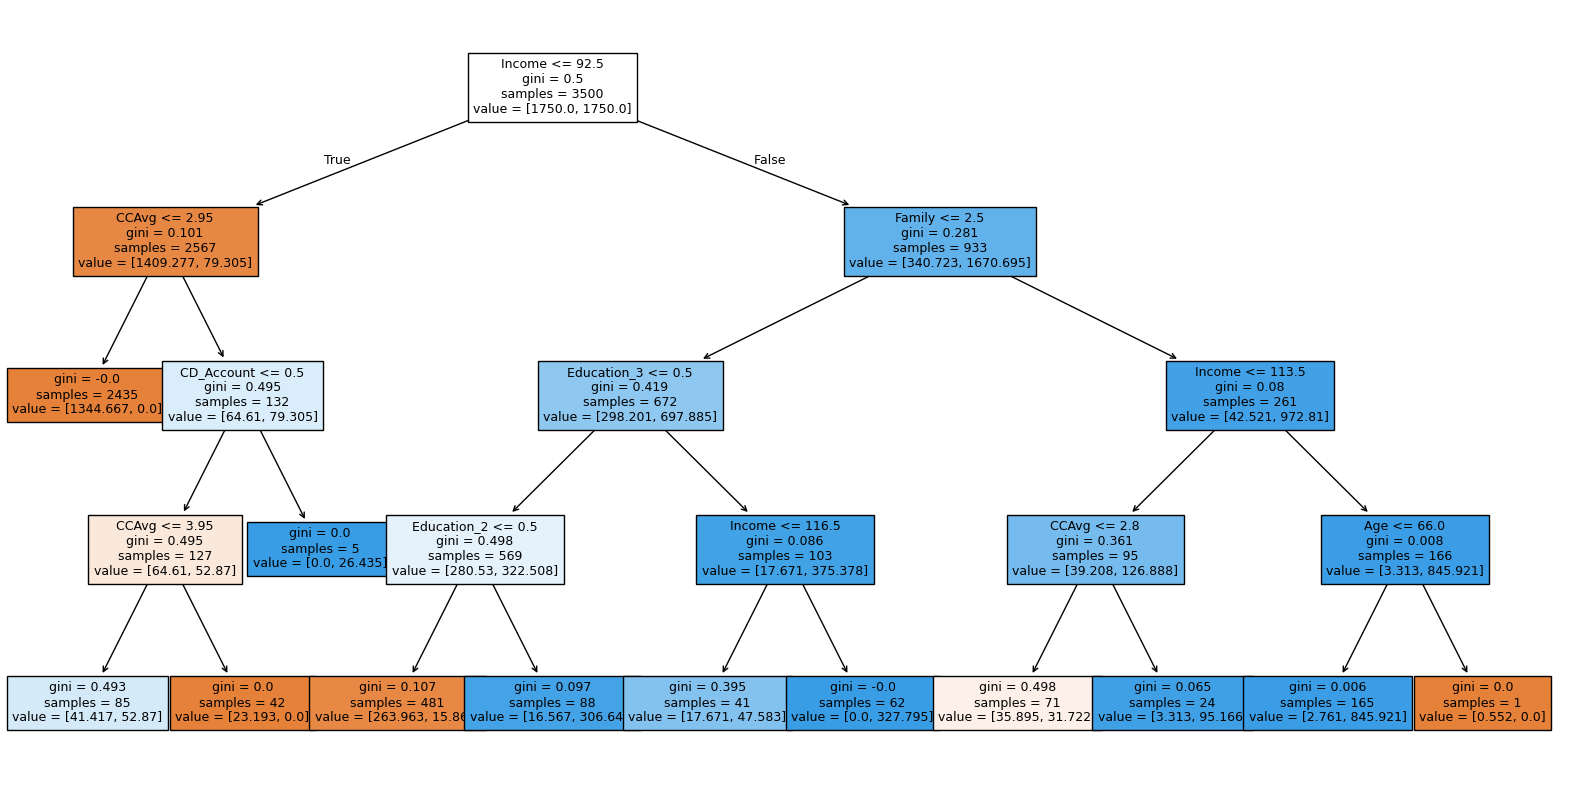

In [ ]:
# Display pre-pruned decision tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### Text Tree

In [ ]:
# Text report of pre-pruned decision tree
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [263.96, 15.86] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [16.57, 306.65] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- Income <= 116.50
|   |   |   |   |--- weights: [17.67, 47.58] class: 1
|   |   |   |--- Income >  116.50
|   |   |   |   |--- weights: [0.00, 327.79] class: 1
|   |--- Family >  2.50
|   |   |--- Income <= 113.50
|   |   |   |--- CCAvg <= 2.80
|   |   |   |   |--- weights: [35.89, 31.72] cla

#### Feature Importance

In [ ]:
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.672754
Education_2         0.151957
CCAvg               0.070332
Education_3         0.053503
Family              0.042446
CD_Account          0.008310
Age                 0.000698
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000
ZIPCode_Group_2     0.000000
ZIPCode_Group_3     0.000000


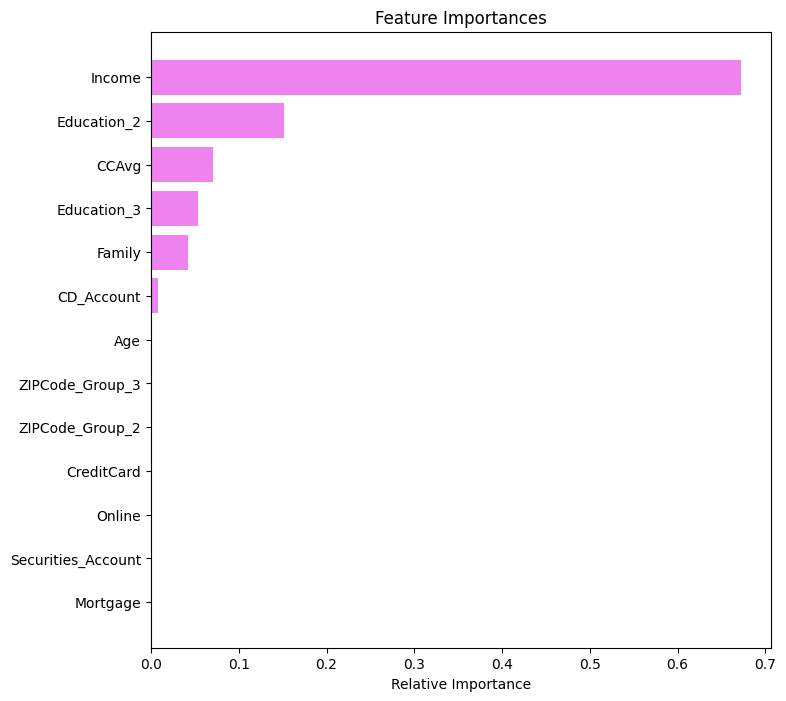

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important features are:
  * Income
  * Education_2
  * CCAvg
  * Education_3
  * Family
  * CD_Account

### Checking Model Performance on Test Data

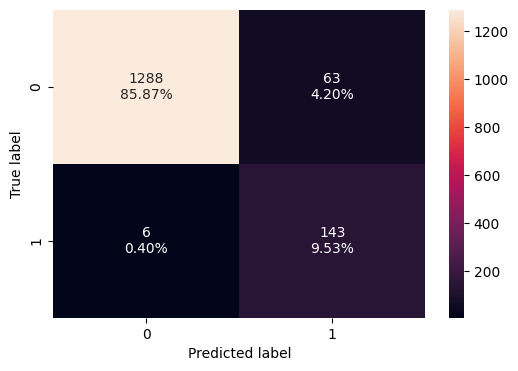

In [ ]:
# Checking performance on test data
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
# Evaluate the performance of the pruned decions tree on test data
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0     0.954  0.959732   0.694175  0.805634

### Post-Pruning

In [ ]:
# Cost Complexity
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000186    0.001114
2     0.000238    0.001590
3     0.000250    0.002090
4     0.000268    0.002626
5     0.000268    0.003699
6     0.000272    0.004244
7     0.000275    0.005344
8     0.000276    0.005897
9     0.000381    0.006278
10    0.000527    0.006805
11    0.000625    0.007430
12    0.000700    0.008130
13    0.000762    0.009654
14    0.000769    0.012731
15    0.000882    0.016260
16    0.000940    0.017200
17    0.001305    0.018505
18    0.001647    0.020153
19    0.002333    0.022486
20    0.002407    0.024893
21    0.003294    0.028187
22    0.006473    0.034659
23    0.025146    0.084951
24    0.039216    0.124167
25    0.047088    0.171255

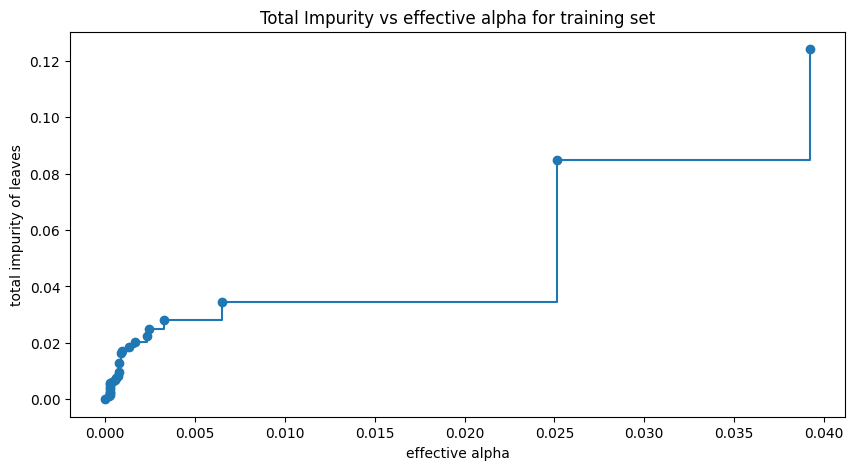

In [ ]:
# plot relationship between ccp_alphas and impurities
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
# Train Decision Tree using effective alphas
clfs = []
# Loop through each value of ccp_alpha
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    # Fit classifier to training data (X_train and y_train)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.04708834100596766


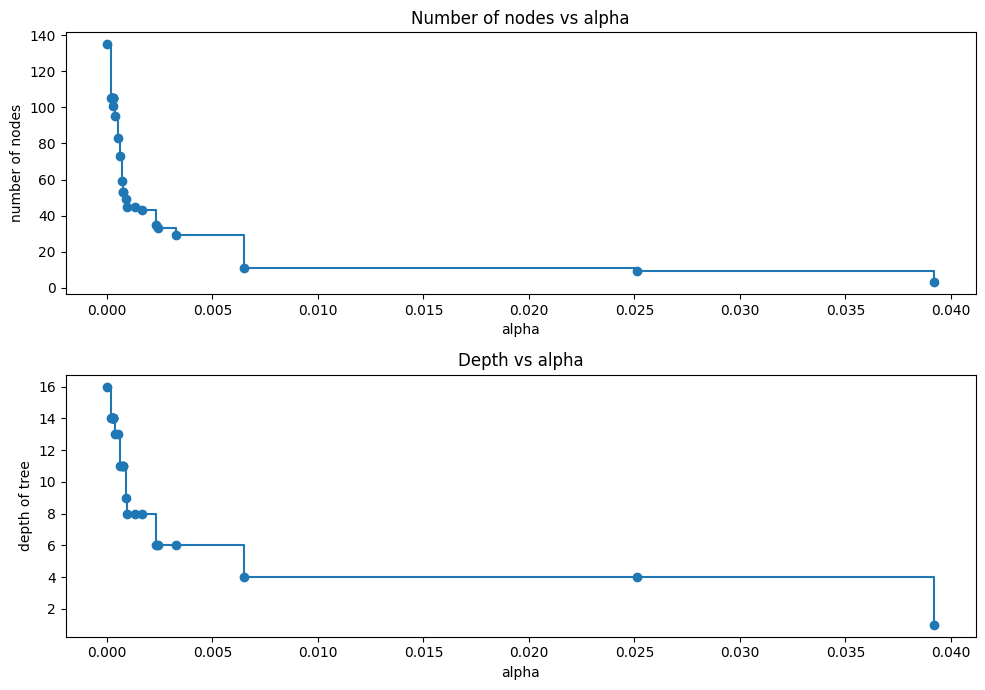

In [ ]:
# Remove the last element from the list of classifiers
clfs = clfs[:-1]

# Remove the last element of the list of ccp_alphas
ccp_alphas = ccp_alphas[:-1]

# Create a list of the number of nodes for each classifier in clfs
node_counts = [clf.tree_.node_count for clf in clfs]

# Create a list of the maximum depths for each classifier in clfs
depth = [clf.tree_.max_depth for clf in clfs]

# Figure with 2 subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Nodes vs alpha
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

# Depth of tree vs alpha
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Recal vs Alpha For Training and Testing sets

In [ ]:
# Initialize empty list
recall_train = []

#Loop classifier in list of classifiers
for clf in clfs:
    # Predict training data using current classifier
    pred_train = clf.predict(X_train)
    # Calc recall score
    values_train = recall_score(y_train, pred_train)
    # Append to recall list
    recall_train.append(values_train)

# Repeat steps for test
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

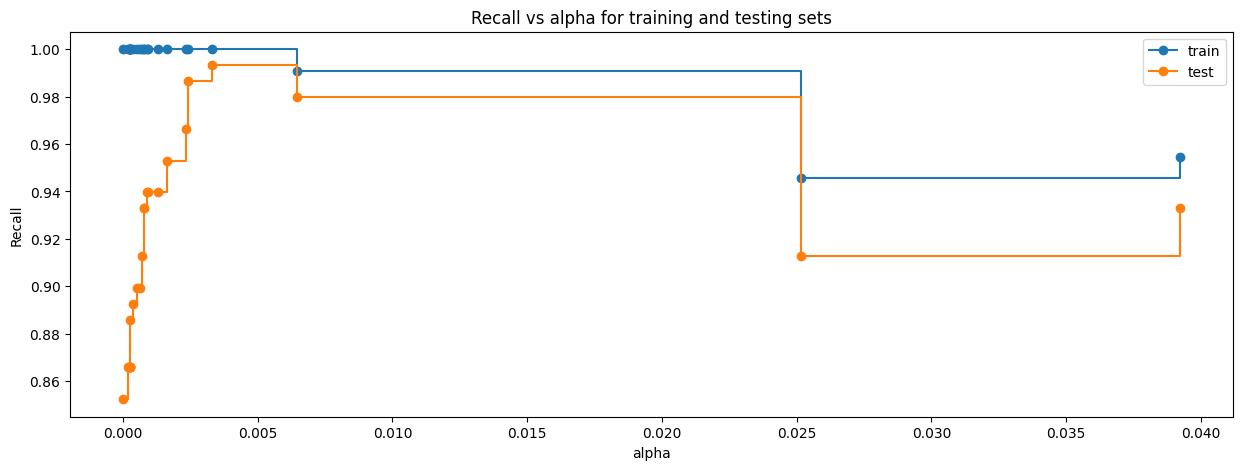

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# Identify index of classifier where recall score on test data is the highest
index_best_model = np.argmax(recall_test)
# Select the classifier with highest recall
best_model = clfs[index_best_model]
# Print details of best classifier
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.003293801935470502, class_weight='balanced',
                       random_state=1)


In [ ]:
# Create decision tree based off of best model classifier
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=best_model.ccp_alpha, class_weight={0:0.15, 1:0.85}, random_state=1)

# Fit new classifier to training data
estimator_2.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.003293801935470502,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

#### Checking Performance on training Data

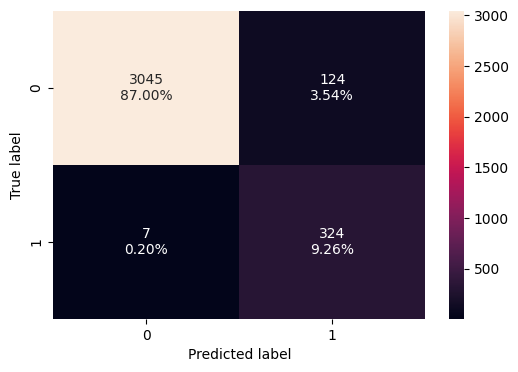

In [ ]:
#decision tree with ccp alpha for training set
confusion_matrix_sklearn(estimator_2, X_train, y_train)

In [ ]:
# Display performance metrics for training set
decision_tree_post_perf_train = model_performance_classification_sklearn(
    estimator_2, X_train, y_train
)
decision_tree_post_perf_train

Accuracy    Recall  Precision        F1
0  0.962571  0.978852   0.723214  0.831836

#### Visualize Decision Tree

##### Image Tree

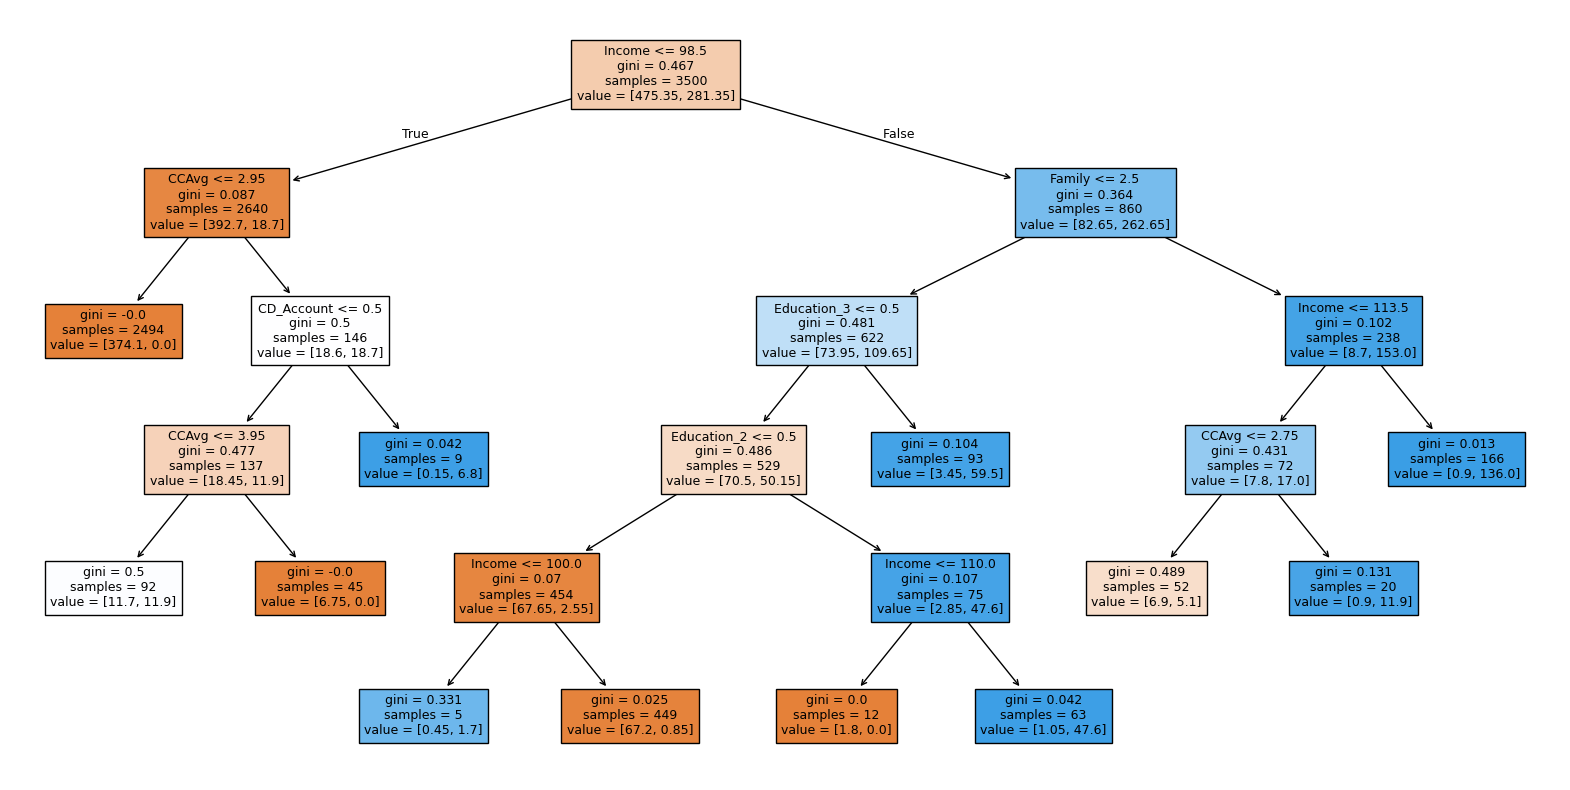

In [ ]:
# Visualize Decision Tree of Post Pruned Tree - Chart
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

##### Text Tree

In [ ]:
# Visualize Post Pruned Tree with Text
print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [11.70, 11.90] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.15, 6.80] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 100.00
|   |   |   |   |   |--- weights: [0.45, 1.70] class: 1
|   |   |   |   |--- Income >  100.00
|   |   |   |   |   |--- weights: [67.20, 0.85] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |--- weights: [1.80, 0.00] class: 0
|   |   |   |   |--- Income >  110.00
|   |   |   |   |   |--- weights: [1.05, 47.60] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [3.45, 59.50] clas

##### Feature Importance

In [ ]:
# Extract feature importance into a dataframe with feature names computed as the Gini Importance

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.628714
Education_2         0.150473
Education_3         0.072248
CCAvg               0.071238
Family              0.065218
CD_Account          0.012109
Age                 0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000
ZIPCode_Group_2     0.000000
ZIPCode_Group_3     0.000000


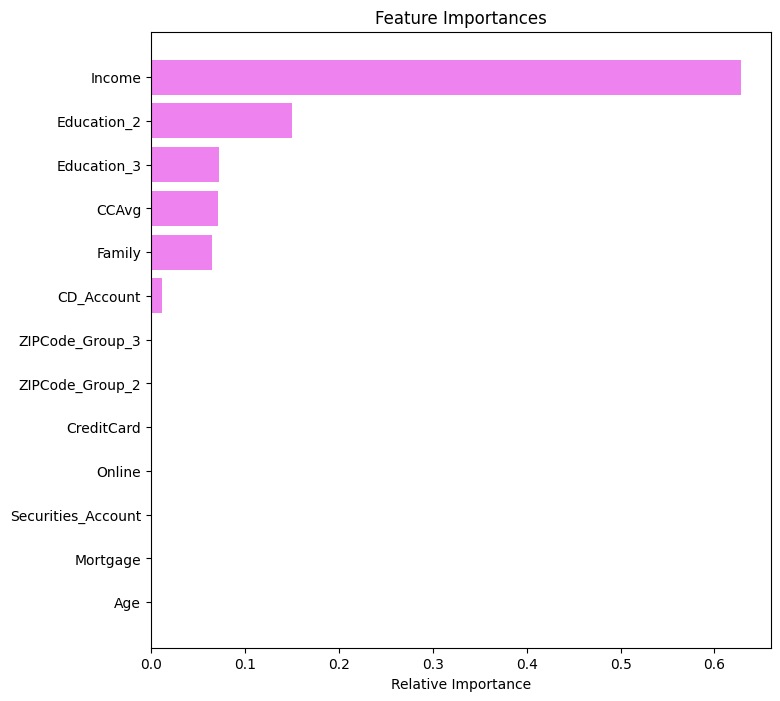

In [ ]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important features of the post pruned tree are as follows:
  * Income
  * Education_2
  * Education_3
  * CCAvg
  * Family
  * CD Account

#### Checking Model Performance on Test Data

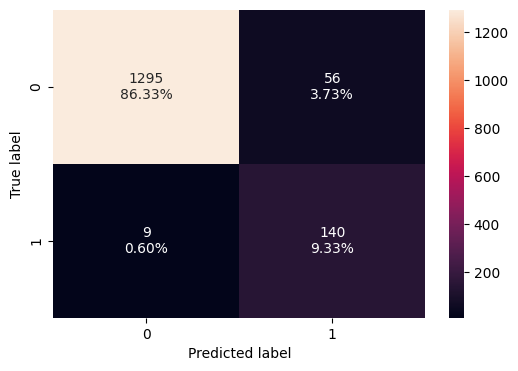

In [ ]:
#Confusion Matrix for post-pruned tree for test set
confusion_matrix_sklearn(estimator_2, X_test, y_test)

In [ ]:
# Compute performance metrics for test set
decision_tree_post_test = model_performance_classification_sklearn(
    estimator_2, X_test, y_test
)
decision_tree_post_test

Accuracy    Recall  Precision        F1
0  0.956667  0.939597   0.714286  0.811594

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                               1.0                     0.955143   
Recall                                 1.0                     0.972810   
Precision                              1.0                     0.685106   
F1                                     1.0                     0.803995   

           Decision Tree (Post-Pruning)  
Accuracy                       0.962571  
Recall                         0.978852  
Precision                      0.723214  
F1                             0.831836

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy                          0.986000                     0.954000   
Recall                            0.912752                     0.959732   
Precision                         0.944444                     0.694175   
F1                                0.928328                     0.805634   

           Decision Tree (Post-Pruning)  
Accuracy                       0.956667  
Recall                         0.939597  
Precision                      0.714286  
F1                             0.811594

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

#### Goal:
To predict whether a liability customer will buy personal loans
* Understand which customer attributes are most significant in driving purchases
* Identify which segment of customers to target more.
* Justification:
  * Based on All Life Banks's Goal of expanding its customer base and converting liabilty customers to personal loan customers, it was concluded that missing out on potential customers would be more of a loss than the expense of marketing spent on bringing in customers. As such casting a wider net of marketing is preferred over focusing on specific marketing for smaller customer bases. The metric that casts the wider net is Recall. Recall measures the proportion of actual positive cases(potential loan customers) correctly identified. A high recall indicates the model excels at identifying potential loan customers.
* Suggestion:
  * Maximize the customers being marketed to who are likely to take out a personal loan so that All Life doesn't miss out on potential personal loan customers.


___

#### Model Comparison:

3 models were looked at:

* Default - This was allowed to grow to completion without restrictions
  * Accuracy: 0.986000
  * Recall:   0.912752
  * Precision: 0.94444
  * F1 Score: 0.928328
* Pre-Pruning - Looking at multiple variables, tree growth was limited based on thos parameters
  * Accuracy: 0.954000
  * Recall:   0.959732
  * Precision: 0.694175
  * F1 Score: 0.805634
* Post-Pruning - Used Cost Complexity to trim the tree after complete growth
  * Accuracy: 0.956667
  * Recall:   0.939597
  * Precision: 0.714286
  * F1 Score: 0.811594


  * All the models were relatively similar in the results for both the training and test data indicating the models have generalized well.
  * Recommended Model: Pre-Pruned
    * Reason being is this model has the best recall score of all the models. Since Recall is what is most important to the client, I think it is best to prioritize the Recall over having a higher precision.

### Customer Profiles
* Potential Personal Loan Customers:
  * Customers with `Income` Less than or equal to 92.50 with a `CCAvg` spend of greater than 2.95 with no `CD_Account` and a `CCAvg` no larger than 3.95
  * Customers with `income` less than or equal to 92.50 with `CCAvg` spend of greater than 2.95 and who has a `CD_Account`
  * Customers with `incomes` greater than 92.50 and `family size` less than or equal to 2.50 and have an `Education_2 `( Masters Education)
  * Customers with `incomes` greater than 92.50 and a `family` size less than or equal to 2.50 with a `professional education (Education_3)` and `incomes` ranging from 92.50 to over 116.50
  * Customers with `incomes` greater than 92.50 with `families` larger than 2.50 people whose `income` is between 92.50 and 113.50 with a `CCAvg` greater than 2.80
  * Customers with `incomes` greater than 92.50 and greater than 113.50 who is 66 years of `age` or younger






# Additional Exploration with Mortgages Handeled Differently - SIDE QUEST

In [ ]:
# Drop Experience as it is closely correlated with Age
# Splitting off Target Variable - Personal loan (y) from rest of the data (X)
X_mort = dataframe_mortgage.drop(['Personal_Loan', 'Experience'], axis=1)
y_mort = dataframe_mortgage['Personal_Loan']

# dummy variables
X_mort = pd.get_dummies(X_mort, columns=['Education', 'ZIPCode_Group'], drop_first=True)

# Split into train and test sets
X_train_mort, X_test_mort, y_train_mort, y_test_mort = train_test_split(X_mort,y_mort, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train_mort.shape)
print("Shape of test set : ", X_test_mort.shape)
print("Percentage of classes in training set:")
print(y_train_mort.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test_mort.value_counts(normalize=True))

Shape of Training set :  (3500, 14)
Shape of test set :  (1500, 14)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


In [ ]:
model_mort = DecisionTreeClassifier(criterion="gini", random_state=1)
model_mort.fit(X_train_mort, y_train_mort)

DecisionTreeClassifier(random_state=1)

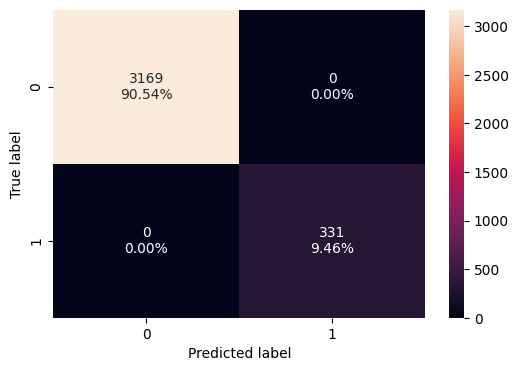

In [ ]:
# Performance Confusion Matrix on Training Data
confusion_matrix_sklearn(model_mort, X_train_mort, y_train_mort)

In [ ]:
decision_tree_default_perf_train_mort = model_performance_classification_sklearn(
    model_mort, X_train_mort, y_train_mort
)
decision_tree_default_perf_train_mort

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [ ]:
feature_names_mort = list(X_train_mort.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_2', 'Education_3', 'ZIPCode_Group_2', 'ZIPCode_Group_3']


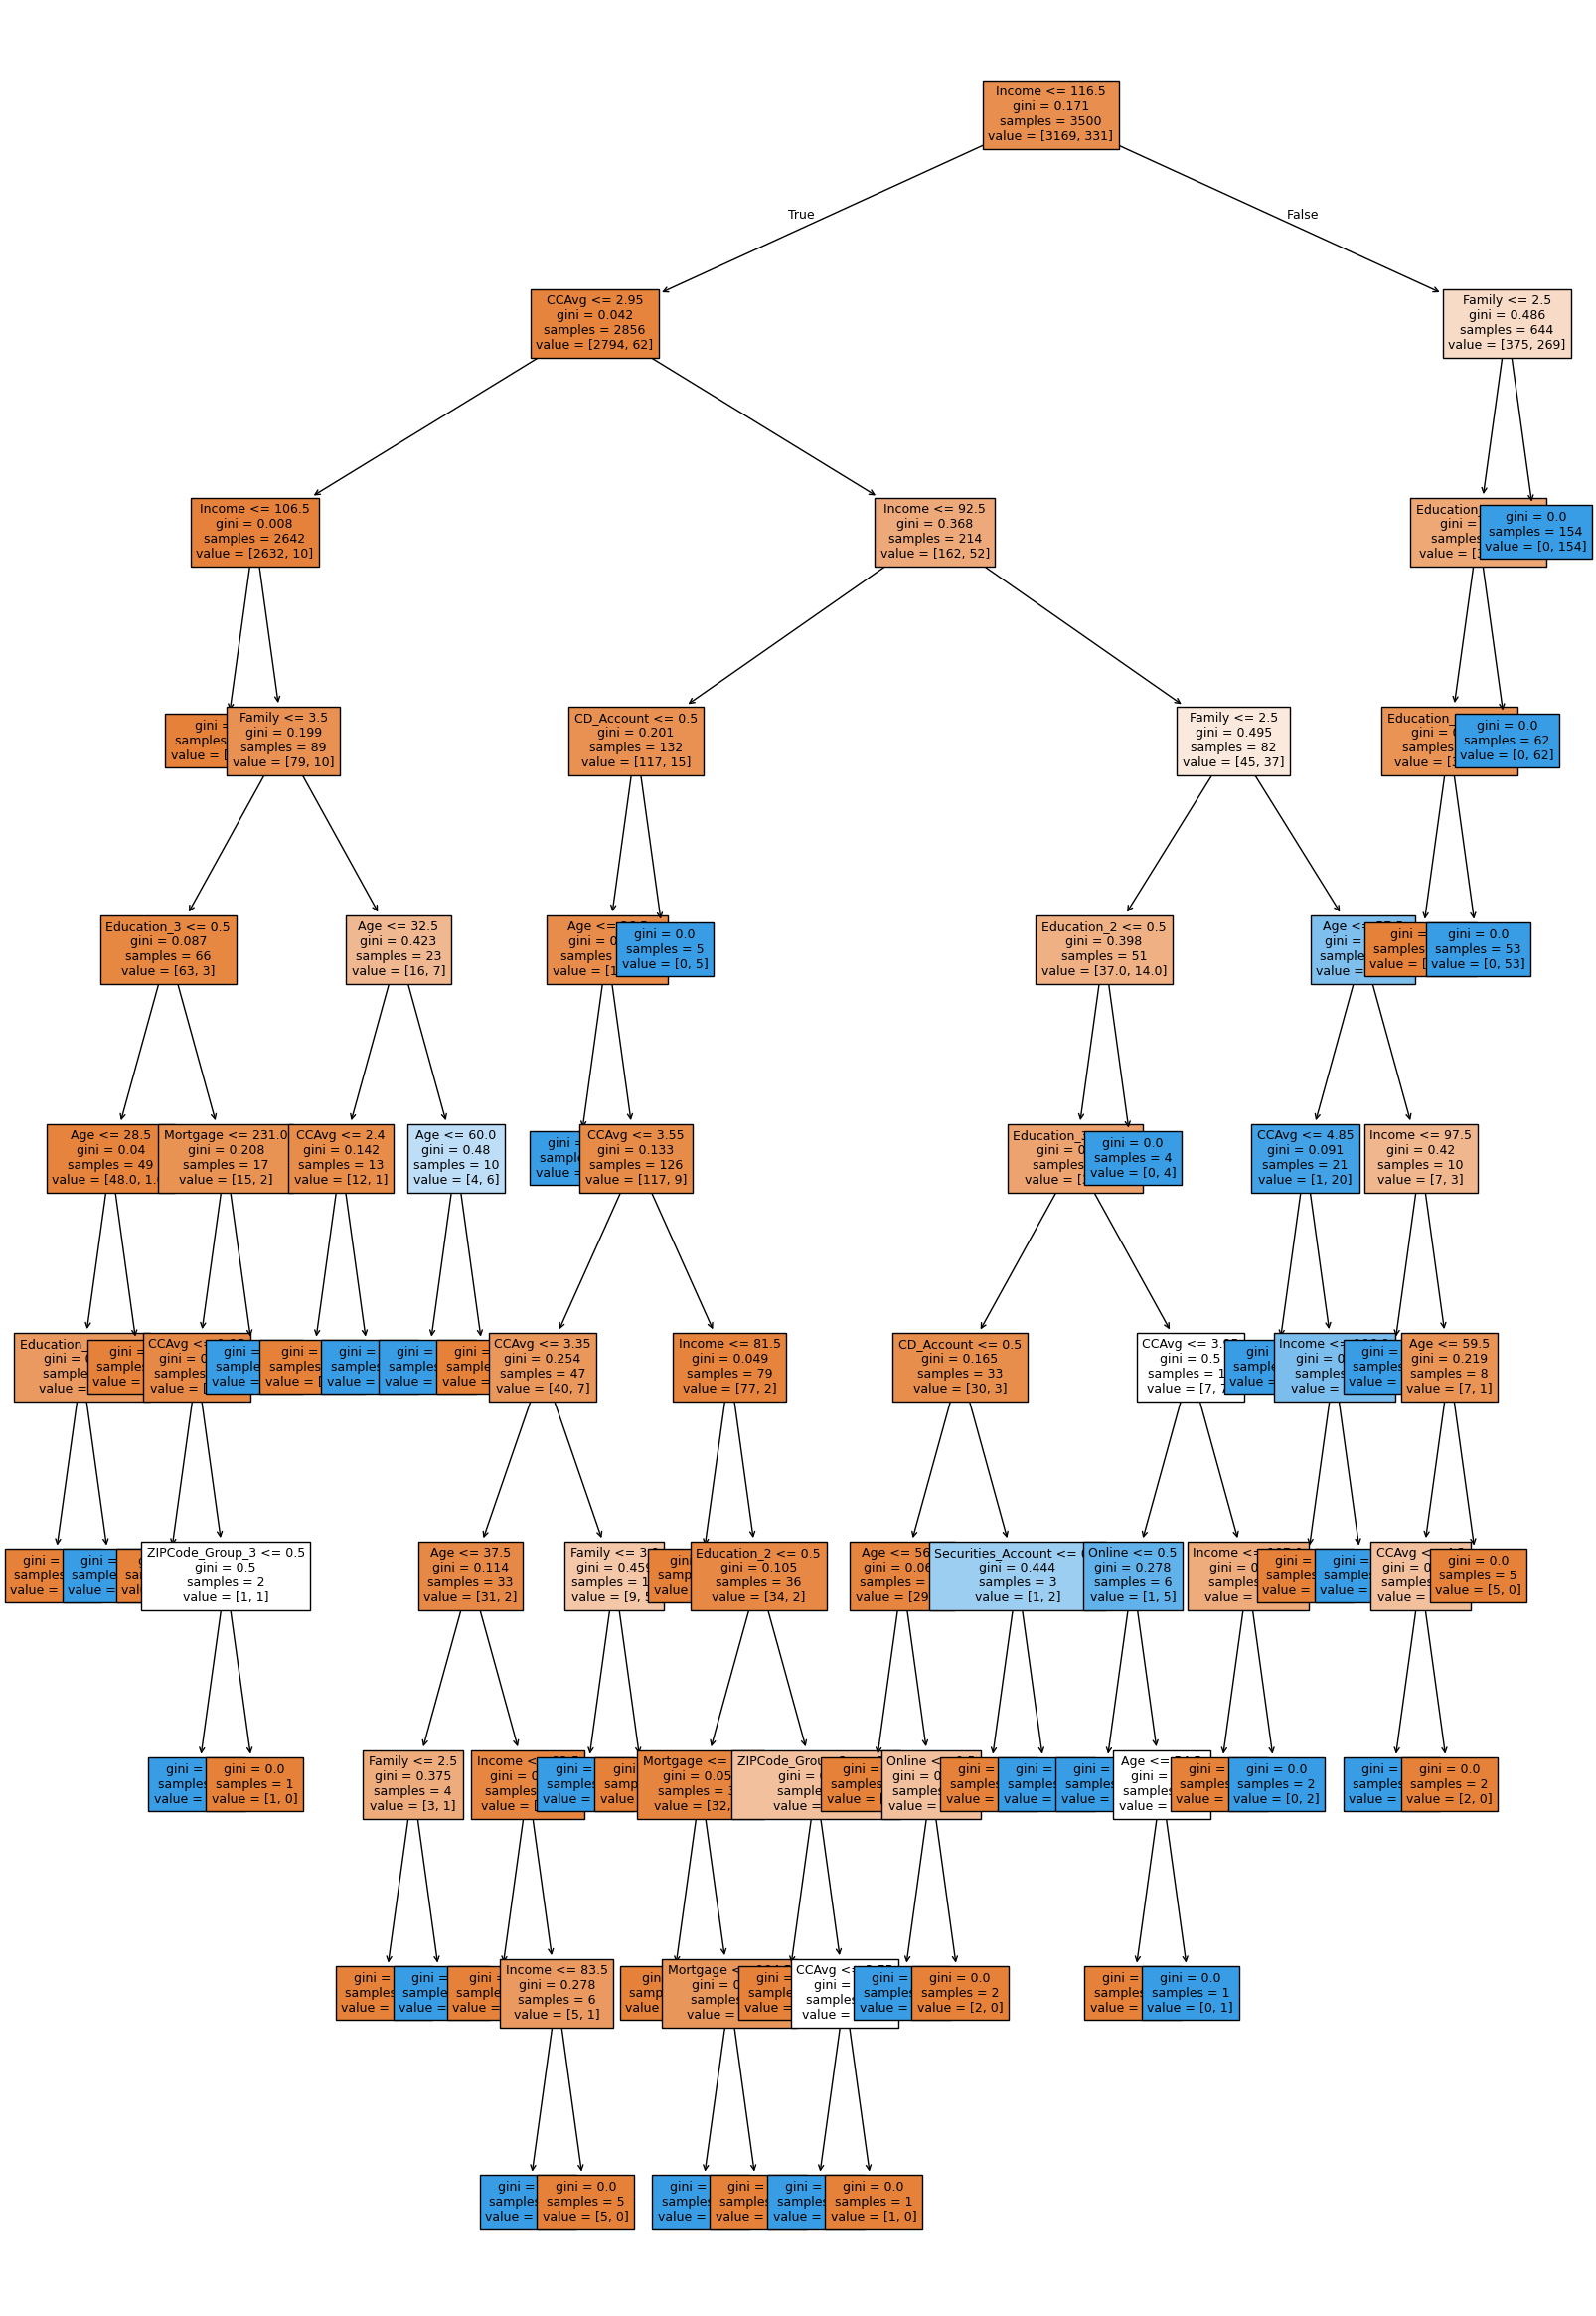

In [ ]:
# Display the Decision Tree - Chart
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model_mort,
    feature_names=feature_names_mort,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Display Decision Tree - Text
print(tree.export_text(model_mort, feature_names=feature_names_mort, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- weights: [43.00, 0.00] class: 0
|   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |--- Mortgage <= 231.00
|   |   |   |   |   |   |--- CCAvg <= 1.95
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  1.95
|   |   |   |   |   |   |   |--- ZIPCode_Group_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- ZIPCode_Group_

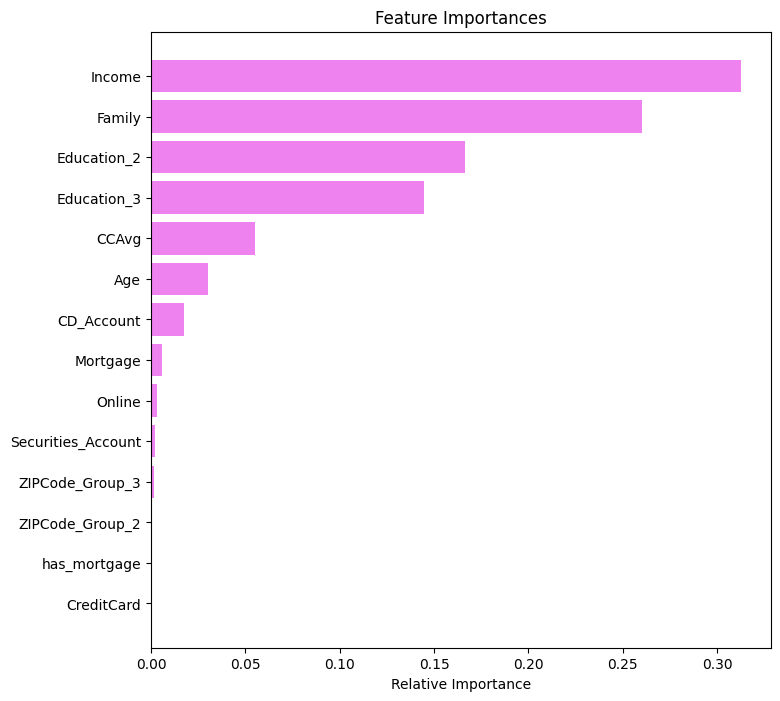

In [ ]:
importances = model_mort.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names_mort[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

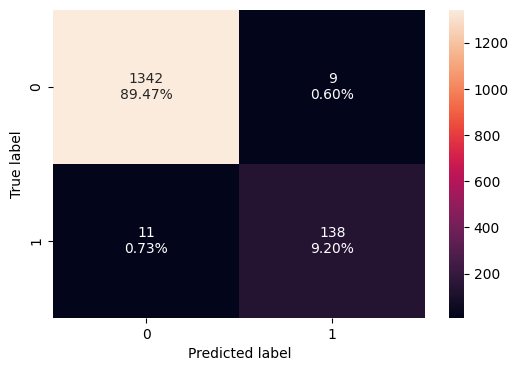

In [ ]:
# Checking 'model' performance on Test Data
confusion_matrix_sklearn(model_mort, X_test_mort, y_test_mort)

In [ ]:
# Compute confusion matrix for Test Data
decision_tree_default_perf_test_mort = model_performance_classification_sklearn(
    model_mort, X_test_mort, y_test_mort
)
decision_tree_default_perf_test_mort

Accuracy    Recall  Precision        F1
0  0.986667  0.926174   0.938776  0.932432

* I wanted to see if I could make the Mortgage more of an important feature by isolating the people who have a mortgage versus those who don't since it's such a large number customers without a mortgage. It seems the mortgages only became a factor for customers making around 100K in income and below.